In [4]:
import spacy
nlp = spacy.load('fr_core_news_md')
from spacy.lang.fr import French
parser = French()

In [5]:
#fichier=open('newfile.txt','w',encoding='utf-8',errors='ignore')

#for i in range (1,len(text_data)):
#    for j in range(1,len(text_data[i])):
#        fichier.write(text_data[i][j])
#        fichier.write(' ')

h=open('newfile.txt','r',encoding='utf-8',errors='ignore')
document=h.read()

def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
        
    return counts 

occurencemin=[]
a = word_count(document)
for cle,valeur in a.items():
    if valeur < 10:
        occurencemin.append(cle)

print(occurencemin)

occurencemax=[]
for cle,valeur in a.items():
    if valeur > 100:
        occurencemax.append(cle)


['baroux', 'consolation', 'juridique', 'consommation', 'développer', 'telecharger', 'telecharge', '1euro', 'atteindre', 'https://www.amazon.fr/foto-kontor-elephone-housse-smartphone-caoutchouc/dp/b078pk775n/ref=mp_s_a_1_8?__mk_fr_fr=åmåzõñ&qid=1543090042&sr=8-8&pi=ac_sx236_sy340_fmwebp_ql65&keywords=elephone+p8+mini+coque&dppl=1&dpid=4160vouhvbl&ref=plsrch', 'https://www.kimovil.com/fr/ou-acheter-elephone-p8-2017', 'lille', 'longueur', 'proposéé', 'tranparente', 'jamme', 'kelly', 'rocke', 'débrouiller', 'réactif', 'possible?si', 'etuis', 'proximité', 'nqqbkhwf', 'héler', 'irriter', 'introduire', 'reconnaître', 'configurer', 'dropshiping', 'quadri', 'désolé', 'relier', 'shopify', 'extrémité', 'une.coque', 'potentiellement', 'action', 'kcapqsyxc', 'décoratif', 'livrable', 'fetes']


In [9]:
import string
from nltk.corpus import stopwords

stop = stopwords.words('french')
exclude = set(string.punctuation)
stop.extend(exclude) #on ajoute la ponctuation aux stop-words
exclure = ("bonjour","svp","aurevoir","merci","louis","haincourt","dealer","plait","plaire","baise","gay","pd")
stop.extend(exclure)
stop.extend(occurencemin)



In [10]:
def prepare_text_for_lda(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop]
    return tokens

print(prepare_text_for_lda("Bonjour commander voudrait coques commandes"))

['commander', 'vouloir', 'coque', 'commander']


In [11]:
import random
raw_data = []
text_data = []
with open('questionv2.csv',encoding='utf-8',errors='ignore') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > 0:
            raw_data.append(line)
            text_data.append(tokens)
print('number of sentences :', len(text_data))

number of sentences : 6833


In [12]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
#print(dictionary.token2id) #dictionnaire des mots avec id

In [13]:
corpus = [dictionary.doc2bow(text) for text in text_data] # la fonction doc2bow convertis notre dictionnaire en bag of word
print(corpus[0])
print(corpus[1])
 # liste de chaque doc, avec le mot:(term ID, term frequency)

[(0, 1), (1, 1), (2, 1), (3, 1)]
[(0, 1), (1, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [14]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

# LDA MODEL

In [15]:
import gensim
NUM_TOPICS = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=100, decay=0.9,chunksize = 5000,alpha='auto')
print(ldamodel)  # Model attributes and parameters
ldamodel.save('model5.gensim')

LdaModel(num_terms=4668, num_topics=25, decay=0.9, chunksize=5000)


In [16]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(2, '0.122*"aujourd\'huie" + 0.059*"regarder" + 0.046*"tomber" + 0.043*"appeler" + 0.043*"sortir"')
(3, '0.079*"coup" + 0.058*"housse" + 0.041*"répondre" + 0.040*"étui" + 0.031*"chat"')
(18, '0.157*"mettre" + 0.142*"photo" + 0.053*"donner" + 0.047*"changer" + 0.046*"pouvoir"')
(15, '0.100*" " + 0.100*"\n" + 0.049*"être" + 0.043*"coder" + 0.038*"entrer"')
(1, '0.091*"\n" + 0.080*" " + 0.069*"coque" + 0.043*"noir" + 0.041*"imager"')
(16, '0.135*"\n" + 0.120*" " + 0.098*"silicone" + 0.056*"coque" + 0.055*"être"')
(8, '0.122*"verre" + 0.105*"tremper" + 0.088*"\n" + 0.087*" " + 0.082*"film"')
(19, '0.084*" " + 0.080*"\n" + 0.036*"coque" + 0.036*"être" + 0.031*"donc"')
(0, '0.077*"\n" + 0.061*" " + 0.053*"avoir" + 0.046*"coque" + 0.032*"7e"')
(10, '0.099*"\n" + 0.097*" " + 0.087*"coque" + 0.083*"personnaliser" + 0.043*"ok"')
(17, '0.132*"\n" + 0.131*" " + 0.058*"avoir" + 0.046*"modeler" + 0.044*"ca"')
(7, '0.103*"avoir" + 0.097*"commander" + 0.077*"être" + 0.071*"\n" + 0.068*" "')
(21, '0.13

In [17]:
import pprint
from gensim.models.coherencemodel import CoherenceModel
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')


# Coherence Score using c_v

coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.36899981918639374

Coherence Score:  -7.972442896552674


In [ ]:
#on test avec le coherence score, le nombre dde topic optimal
import gensim
import pprint
from gensim.models.coherencemodel import CoherenceModel
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
listecoherence=[]
for i in range(1,40):
    
    NUM_TOPICS = i
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score POUR TOPIC: ', i ,' :',coherence_lda)
    listecoherence.append(coherence_lda)    


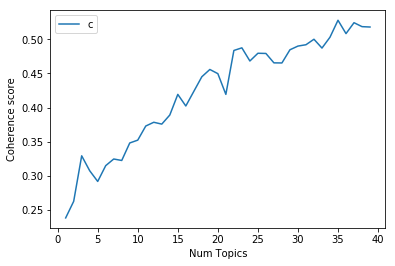

In [26]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, listecoherence)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

c:\users\pierre\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [19]:
import random
raw_data2 = []
text_data2 = []
with open('questionreponses.txt',encoding='utf-8',errors='ignore') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > 0:
            raw_data2.append(line)
            text_data2.append(tokens)
print('number of sentences :', len(text_data2))

number of sentences : 6465


In [47]:
get_document_topics = [lda.get_document_topics(item) for item in corpus]
threshold = 0.75
topics_repr = {}
for i in range(lda.num_topics):
    topics_repr[i+1] = []

for i in range(len(get_document_topics)):
    scores = get_document_topics[i]
    for (topic, score) in scores:
        if score > threshold:
            topics_repr[topic+1].append(raw_data[i])



cpt=0
for topic in topics_repr:
    for s in topics_repr[topic]:
        cpt+=1



for topic in topics_repr:
    print(str((len(topics_repr[topic])/cpt)* 100) +"%")
    print("TOPIC nb"+str(topic)+"\n")
    if len(topics_repr[topic])/len(raw_data) > 0.01:
        for s in topics_repr[topic]:
            if 20<len(s)<100:
                print(s)
    print("##################################################################")


2.0097020097020097%
TOPIC nb1

##################################################################
2.2176022176022174%
TOPIC nb2

##################################################################
0.0%
TOPIC nb3

##################################################################
0.2772002772002772%
TOPIC nb4

##################################################################
5.058905058905059%
TOPIC nb5

 bonjour vous livre en Belgique??

 Est ce que vous livrez à la Tunisie ?

 Vous ne recréez pas une commande?

 jamais tenté avec ub gars ?

 10000euro pour votre site ?

 vous livrez en guadeloupe ?

 Bonjour, vous livrez en belgique ?

 Vous avais que elle ??😅

 Si nous sommes pas satisfait pourront nous echanger de coque ?

 bonjour, est-ce que vous livrez en suisse?

 Bonjour, livrez vous en suisse ?

 vous l'avez testé ?

 est-ce nécessaire ?

 oups desolée big boss je tape la discute vous voulez venir ? :)

 JE NE PEUX PAS LA VISUALISER ?

 Est ce que vous livrez en Belgique?

 es


 content pour Trump ?

 Pouvez vous l'envoyer par confirmation mail svp ?

 bonjour quel est le délai de livraison pour une  coque ?

 quel type de livraison je doit choisir ?

 quel est le délai de livraison ?

 C'est du vrai carbone ?

 vous êtes des dealer ?

 celle avec les bonbons ?

 Pouvez-vous rectifier ?

 Quel est le délai de livraison?

 Ou sont il frabique ?

 faites vous la livraison dom tom?

 louis, elle est ou jeanne ?

 16h10 livraison demain ou pas ?

 faites vous les livraisons dans le dom?

quels sont les délais de livraison ?

 Quel modification ?

 Bonjour un dealer n'est pas un trafiquant de drogue aha ?

 j'envoi sur quel adress mail cette phot , ou par SMS ?

 Bonjour, quels sont les délais de livraisons?

 Bonjour, est ce qu'il serait posssible de connaître la date de livraison ?

 Quel serait le prix pour expédier au canada?

 bonjour quels sont les delai de livraison en france?

 Livraison en nouvelle-caledonie?

 Bonjour, quels sont délais de livraison et 


 Je recherche une coque d'iphone 6 avec une fille dessus

 oui je recherche une coque iphone 6s

 Je recherche un coque pour mon iphone SE

 et avec un iPhone 5c ?

 Je recherche un coque

 Je recherche une coque d'iphone 6

 Je recherche une coque pour iPhone 5s

 Je recherche une coque pour mon iPhone 6

 Je recherche une coque pour iPhone 5s

 Je recherche des coque iphone 6

 Bonjour je recherche une coque iPhone 6 transparent

 je recherche une coque d'iphone 5S

 Je recherche une coque iPhone 5s

 c'est le même pour le SE et pour le 5 ?

 Je recherche une coque d'iPhone 6s pas cher originale

 Je recherche une coque pour mon iphone 6s

 pour un iphone 5s, vous en avez?

 merci, vous avais des coque en au ?

 Oui je recherche une coque

 Bonjour, oui je recherche une coque iPhone 6 portefeuille

 je recherche coque iphone 6

 Bonjour je recherche une coque de protection pour iphone 5S

 je recherche une coque d'iphone 5s

 Je recherches une coque pour mon iPhone 6

 je recherche 


 vous pensez qu'elle s'est perdue en route ?

 Êtes vous vraiment Louis haincourt?

 Êtes vous vraiment Louis haincourt?

 Que faut-il comprendre ? que doit on acheter ? on est perdus !!

 les frais de port sont a combien ?

 et pour les frais de ports?

 le port s'élève à combien ?

 De combien son les frais de port ?

 Il y a des coques en rails ou faut la fumer ?

 Sinon, voyez vous un autre équipement très utile auquel on ne pense pas forcement ?*

 Bonjour! est ce que vous avez des coques Supreme??

 De combien sont les frais de port?

 dites moi, vous avez des coques sur le pastaga ?

 il y a des frais de port ?

 floveme est-ilun clapet vertical ou horizontal ?

 Il y a vraiment quelqu'un ou c'est l'ordinateur qui est programmé?

 arhh le 630 n'est pas compatible ?

 oui!Combien coutent les frais pour une commande vers la suisse?

 il y a un suivi de ce dossier ?

 je ne comprends pas bien, il y a que les bords de flexible ?

 Pouvais vous me donner les prix de frais de port s'

In [48]:
for topic in topics_repr:
    print("TOPIC nb"+str(topic)+"\n")
    for s in topics_repr[topic]:
            print(s)
    print("###############################################")

TOPIC nb1

 est ce que vous avez cette coque aquarium en caoutchouc ?

 vous avez une copines??

 Vous en avez a me proposer ? bumper integrale ?

 Pour les deux cas?

 les coque sont-elle fine ou épaisse ??

 Je l'aurais lundi ?

Aurora Maria Belbe.

 la marque méat japan est une marque française ?

 pas en point relais? :/

 même sur les côtés?

 et vous avez des coque pour l'ete ?

 et pour garçon vous n'avez rien qui fait référence au Portugal par hasard ?

 Pas de problème. Cela peut arriver. L'envoi pour demain est-il sûr ?

 Sûr vous en aurez la semaine prochaine ?

 Bonjour Je cherchais une coque pour mon Honor 8 mais je vois que ce n'est pas proposé. Prévoyez vous de le faire ?

 Bonjour Je cherchais une coque pour mon Honor 8 mais je vois que ce n'est pas proposé. Prévoyez vous de le faire ?

 j'ai fait une coque a la soirée au forum digital avez vous encore les logo?

 Avez vous des coques donald trump ?

 2 coques?

 mais sur une coque 360, sa ne gêne pas ?

 bonjour  je ch


 en echange ?

 Bonjour, auriez vous des coques personnalisable pour Samsung galaxy A5 2015 ?

 vous travailler pour ce site ?

 https://www.google.fr/imgres?imgurl=http%3A%2F%2Fi2.cdscdn.com%2Fpdt2%2F4%2F6%2F5%2F1%2F700x700%2Favi3662427056465%2Frw%2Fcoque-gel-integrale-apple-iphone-5-5s-blanc.jpg&imgrefurl=http%3A%2F%2Fwww.cdiscount.com%2Ftelephonie%2Faccessoires-portable-gsm%2Faccessoires-iphone-5%2Fcoques-iphone-5%2Fl-144202602.html&docid=a9SZIVUHUpT0ZM&tbnid=TzBa4TqJfLRS7M%3A&w=700&h=700&hl=fr&bih=492&biw=320&ved=0ahUKEwjc_L-2x8_MAhVpAcAKHWt5B0UQMwglKAEwAQ&iact=mrc&uact=8

 Hello, are you using browser tabs ? the majority of internet users do, and we have a way to make your sites browser tab standout : http://profit-tabs.online

 Bonjour. Je recherche une coque pour galaxy A3

 Avec spatule et chiffons?

 bonjour je recherche une coque sansung galaxy S5 new

 je cherche une coque avec du liquide pour samsung galaxy A3, est ce que vous en avez?

 Avez-vous des coques pour Timmy ?




 En avez vous ?

 Du coup est-ce que vous m'envoyer un mail de confirmation du nouvel envoi ?

 Le CACA c'est délicieux?

 Je vous remercie. Pouvez-vous m'indiquer quelle coque vous m'avez envoyée ? Pour quel type de smartphone ?

 soit 130eur?

 Quel sera le délai de réponse ?

###############################################
TOPIC nb8

 est-ce normal?

 est-ce normal?

 Toujours rien?

 mais je vois pas le rendu ? normale

 Bonjour j'ai commander une coque jeudi et toujours pas arriver c'est normal ?

 l'avez vous recu ?

 c'est normal?

 Bonjour, je viens de faire ma commande. Par contre, j'ai rentré le code promo du jour NOSTO-G7 pour avoir mon chargeur de voiture offert, mais il n'apparait pas dans ma commande. Est ce normal?

 j'ai rentré le code NOSTO-G7 dans ma commande HNANWWCRN mais je ne vois pas le cadeau affiché dans ma commande?

 merci mais vous êtes sur de ne pas être un ordi ?

 toujours pas de nouvelles?

 bonjour, j'ai vu vos messages trop tard hier, je vous envoie l


 avez vous des coques game of thrones ?

 fond transparent ?

 Vous avez que cette couleur?

 Bonjour, auriez vous des coques qui recouvrent l'avant et l'arrière du téléphone ?

 C'est cela ?

 non c'est qui ?

 donc c'es comme une coque?

 et c's transparent?

 elles me plaisent bien mais est-ce que ça couvre tout l'arrière du téléphone ou seulement le contour ?

 Le fond de couleur de la coque est transparente ou blanche ?

 C'est vous qui gérez le site ?

 Avez vous plus de détails de votre coté ?

 c cher ou pas ???

 Et concernant la coque éléphant coloré elle est bien transparente avec les éléphants en couleur ?

 Il n'est pas possible de voir le rendu avec un téléphone gris métal ?

 avez vous le même type de coque transparente mais a rabat transparent aussi ?

 ce n'est pas grave, bientôt de nouvelles coques disponible ou pas?

 ba ecoutes je suis à l'esg en MBA et toi ?

 ok par contre est ce qu'elle remonte sur le bouton de devant ? ou juste le contour ?

 Mais le problème s


 coque?

 oui, je recherche un coque pour mon nouvelle iphone 5

 Je recherche une coque qui protège et design

 Je recherche une coque d'iphone 6 avec une fille dessus

 oui je recherche une coque iphone 6s

 Je recherche un coque pour mon iphone SE

 et avec un iPhone 5c ?

 Je recherche un coque

 Je recherche une coque d'iphone 6

 Je recherche une coque pour iPhone 5s

 Je recherche une coque pour mon iPhone 6

 Je recherche une coque pour iPhone 5s

 Je recherche des coque iphone 6

 Bonjour je recherche une coque iPhone 6 transparent

 je recherche une coque d'iphone 5S

 Je recherche une coque iPhone 5s

 c'est le même pour le SE et pour le 5 ?

 Je recherche une coque d'iPhone 6s pas cher originale

 Je recherche une coque pour mon iphone 6s

 pour un iphone 5s, vous en avez?

 merci, vous avais des coque en au ?

 Oui je recherche une coque

 Bonjour, oui je recherche une coque iPhone 6 portefeuille

 je recherche coque iphone 6

 Bonjour je recherche une coque de protection


 ça va ?

 Comment ça ?

 Comment je fais pour le remboursement ?

 Comment je vais faire pour en bénéficier

 Comment on fait ??

 Et comment

 comment on fait pour céer une coque

 facile a poser?

 comment faire ?

 Comment sa

 comment se déconnecter

 comment se déconnecter

 comment se déconnecter

 puis je vous faire une suggestion?

 vous etes la ?

 Avez vous des coques chevaux ?

 c'est vous qui le posez ?

 Salut comment ça va

###############################################
TOPIC nb15

 En quoi ?

 Et vous faite des choses interessante???

 Rémi ???

 vous êtes nombreux en modérateurs ?

 Coque fluorescente ?

 Merci ! je recherche exactement la même chose, mais avec la tête de mort en 3D, avec des LED dans les yeux par exemple :)

 c'est votre 3D ? c'est en relief ?

 mais c'est un carre ?

 D'accord ce n'est pas grave merci elle sont épaisse quand meme elle protége assez bien ?

 et le quick?

 avez vous des coqes pantone?

 ce n'est pas grave si le carré s'écarte énormé


 Bonjour, le format des coques HUAWEI P10 correspond-il au format du portable P10 lite ?

 Merci, vous ne faite donc pas de coque pour le modèle P10 lite ?

 devant ?

 Et vos consommations intermédiaires ?

 Bonjour pratiquez vous le dropshipping ?

###############################################
TOPIC nb19

 Une qui ressemble ?

 Et pour le mettre?

 Avec une photo ?

 Mon nom ou la référence ?

###############################################
TOPIC nb20

 ou en est ma commande  SKM68KHGV   ???

 Equilibrez moi l'équation suivant : H+  + OH-  =  ???

 Ha d'accord ! Et si le téléphone tombe à plat pat terre le bumper est utile ?

 Donc en Bretagne ?

 Oh merci il ne fallait pas donc la Y se déduira de ma commande ?

 Et si elle est plus grande ?

 Elle n'est pas trop grande ?

 Vous êtes suuuuuuur ?

 Donc cela glisse facilement des mains?

 ha, de plus j'imagine la prise en main plus agréable? moins glissante que le plastique non?

 NON  MERCI JE RECHERCHE UNE COQUE

 le cache?

 son


J'ai réalisé une commande en mode invité et j'ai ensuite crée un compte personnel sur votre site.

 mathieu?

 Donc comment Ca ce passe pour que je reçoive ce que j ai commencer et vous renvoyer elle qui n es pas la bonne

 du coup je serai remboursé pour l'une (celle de 13,99€) et l'autre arrivera alors?

 En avez-vous d'autres de ce genre?

 connaisant une personne qui a acheté une coque personalisé chez vous il y a a peine une semaine m'a dit que vous aviez eu un soucis avec la machine donc au cas ou elle aurait un defaut ??

 en deposant un recours aupres de la poste vous pensez avoir plus d'information?

 mais par la technique que vous marquez sur votre site, vous êtes sur les colis arrivent bien chez vous?

 Avez-vous des nouvelles concernant ma commande ?

 avez-vous d'autre coque avec les rebors resistant ?

 Existe t'elle en autre coloris?

 bonjour je vous ai envoyé un message juste sur un autre chat l'avez vous reçu ?

 y a t il un email pour faire ce type de commande ?

 a


 Comment sa se passe pour l'envoie ? Dans combien de temps je la recevrai ?

 sous combien de temps ?

 Vous allez bien ?

 dans combien de temps pensez vous que nous la recevrons ?

 Merci et les coc qui vont sou l'eau vous aller en recevoir quand???

 quand vais-je la recevoir?

 Quand recevrai je la coque ?

 je le recevrais dans combien de jours a peut pres ?

 Bonjour, si je commande aujourd'hui quand est ce que je recevrais ma coque ?

 vous savez en combien de temps? svp?

 et c'est combien?

 tu vas bien ?

 quand est ce que je la recevrait ?

 bonjour, pouvez-vous me dire dans combien de temps je recevrais ma commande ? GSXLGSDSV

 Et je la reçoit quand ?

 Commande passé ce jour ?

 Bonjour les coque son envoyer combien de temps après la commande passé ?

 Je la receverai quand ??

 vous pensez en recevoir quand ?

 elle va arrivée dans combien de temps ??

 bonjour, sous une réserve de combien de jours recevront nous les coques?

 Si je commande tout de suite vous pensez qu

In [49]:
for i in raw_data2:
    print(i)

﻿ honor 7 ? Nous ferons très certainement ce type de portable d'ici 30 jours. Je vous prie de nous excuser mais pour le moment nous ne proposons pas ce type de coque

 bonjour, je cherche à laisser un commentaire. Mais je ne sais pas comment on s'y prend. Bonjour Avez vous déjà passé commande ?

 qu'est-ce tu veux pd? Vous dire bonjour :)

 bonjour, oui je recherche une coque d'iphone 6 transparente Bonjour, Je vais vous trouver le lien exacte de votre demande, je reviens tout de suite

 Bonjour, je recherche une coque pour mon Luia 830 Bonjour Je regarde tout de suite, je reviens tout de suite

 comment faire pour changer la police d'un seul partie du texte Bonjour

 comment ajouter une zone de texte Je me renseigne tout de suite

 comment ajouter une image venant  d'internet Dans ce cas; le plus simple est que vous enregistriez au préalable votre image sur votre ordinateur. Clique droit sur la photo, enregistrer sous votre bureau et ainsi vous pourrez directement prendre la photo dep


 Bonjour, je recherche une coque pour mon iphone 6s Oui, vous souhaitez plutôt une coque design ou plutôt protectrice ?

 Design c'est à dire ? Je voulais dire quelque chose d'assez élaboré, ou plutôt une coque unie avec une seule couleur, quelque chose de discret on va dire.

 je recevrai un mail pour l'avoir ? Oui sous 24H :) (dès le départ de votre commande).

 Bonsoir, je voulais savoir pourquoi vous appelé le film en verre pour le s6 edge integral  ? C'est un film en verre qui retrouve intégralement l'écran de votre téléphone :)

 Bonjour. Livrez-vous en angleterre? Oui sans problème :) Il faut juste ajouter 2 jours pour la livraison.

 je cherche ce model, vous l avez? Non, je suis navré, nous n'avons pas de coques Spigen.

 les bords noirs svp sont souple ? La totalité de la coque est rigide pour éviter de déformer votre coque :) visuel excusez moi.

 ou c'est vraiment la totalité de la coque qui est en plastique rigide ? La totalité de la coque est rigide pour éviter de déform


 okay et dans le sachet rouge c'est tou>? vérifie bien à chaque fois le nombre de produit aussi

 ?* numéro de commande stp ah ok pour ce type de produit pas de film expédie sans c'est une erreur sur le produti car les films n'existent pas :) quand tu auras fini tu as les preparation en cours (1) aussi tu en as 4-5

 pour la martinique comment j'envois? tu mets un timbres à 2.03€ 100 grammes au lieu de 50 grammes je t'expliquerai plus tard mais là c'et pas grave

 j'ai un chronoposte je fais comment? j'arrive

 d'accord les bords aussi sont durs ? Les bords sont en silicone si vous choisissez l'option silicone :) Ils ne sont donc pas durs :)

 hey mec tu gère des codes promo pour les gars de l'emn ? Bonjour, il y a un code promo c'est EMN :)

 Bonjour, il me semble qu'il y a un code promo valable aujourd'hui ? Bonjour, il n'y a pas de code promo en particulier ce jour :) Il y a les codes promo tel que LAPOSTE qui vous fait bénéficier des frais de livraison gratuit à partir de 30 euros


 Est ce que vous avez des coques personnalisable pour IPOD TOUCH 6 ? Oui nous faisons des coques personnalisables pour ipod touch 6. Elles ne sont pas encore en ligne mais le seront dans la semaine. Je peux cependant lancer une impression si vous m'envoyez le visuel souhaité :)

 Parfait alors ! je dois vous fournir quel format ? png , pdf ? ou un psd ? PNG sera parfait! (même un JPG convient :)) Je vous invite à m'envoyer le visuel à sav@dealerdecoque.fr

 Parfait , je suppose qu'il vous faut une adresse d'envoie pour envoyer l'impression ? je vous la fournie dans le mail ? Je vais avoir besoin de votre adresse précise (batiment etc), un nom et un numéro de téléphone :) Incluez le dans le mail ça sera parfait!

 OUI? MON i pAD NE RENTRE PAS DANS CETTE COQUE D'accord. Malheureusement, je ne peux échanger le produit car c'est une coque personnalisée, nous ne pouvons la vendre à nouveau. Une fois préparée et imprimée, la coque n'est plus revendable. Je peux néanmoins vous offrir un gest


 Bonjour j'avais commandé deux coques simultanément sur votre site et pour l'instant je n'en ai reçu qu'une, vais-je recevoir la deuxième ultérieurement ou est ce une erreur de livraison ? :) Bonjour :) je regarde tout de suite le suivi de votre commande :) Je vais contacter mes collègues qui gèrent les expéditions. Je reviens vers vous par mail dès que j'ai une réponse de leur part. :)

 Bonjour,cela fait plus d'une semaine que ma commande affiche "en cours de livraison" est ce parce que j'habite en Belgique ? Bonjour, c'est fort possible! Il faut compter 7 à 10 jours pour la Belgique. :) N'hésitez pas à revenir vers moi si dans 1 semaine vous ne l'avez toujours pas à sav@dealerdecoque.fr

 comment vous retourner une commande suite a une erreur Bonjour, c'était une coque personnalisé? :) Zendesk profile page: https://dealerdecoquefrance.zendesk.com/agent/#/users/2566275059 Name: bosley.rossi User has no open tickets

 Ma commande à bien t-elle été pris en charge? Bonjour Jacob. Avez 


 si les photos dépassent de la coque c'est pas grave? Non ce n'est pas un soucis, les parties qui dépassent n'apparaîtront juste pas sur votre coque. :)

 on ne verra pas ce qui dépasse? Non ce n'est pas un soucis, les parties qui dépassent n'apparaîtront juste pas sur votre coque. :)

 vous trouvez ca bien? Très bonne idée! :) Oui nous avons beaucoup de commandes pour des anniversaires! C'est toujours sympa de recevoir un cadeau fait sur mesure. )

 est ce que les boutons sur les côtés su téléphone seront cachés par la coque? ou il y a des trous? Les boutons sont recouverts, il y a des trous au niveau des zones de branchement.

 a quoi sert le film protecteur? Le film protecteur en plastique sert à éviter les rayures sur votre écran. Celui en verre trempé lui protège contre la casse. :) Non aucun soucis pour appuyer sur les boutons. :)

 mais c'est facile d'appuyer dessus quand meme? Le film protecteur en plastique sert à éviter les rayures sur votre écran. Celui en verre trempé lui 


 Pouvez-vous me dire dans quelle matière est la coque que je compte commande ? Elle est en silicone flexible. :)

 j'ai commandé, pourriez-vous m'indiquer la marche à suivre en cas de retour ? Parfait. :) Je vous envoie cela tout de suite! Voulez vous que je vous l'envoie par mail pour garder une trace de la procédure?

 Voilà, je cherche une coque pour mon Samsung Galaxy A3 2016, est-ce que vous en avez ? :) Oui bien sûr! :) Vous les trouverez sur cette page: http://dealerdecoque.fr/fr/406-coque-samsung-galaxy-a3-pas-chere

 suces tu ?

 ou etes vous en France ? OUi Excusez moi, j'ai laissé ouvert alors que je me suis absenté. Nous sommes à Langrune sur Mer dans le Calvados et à Versailles. (l'entrepôt et le service client sont en Normandie et la partie commerciale à Versailles).

 oui, on peut negocier les prix ? Vous pouvez obtenir un tarif préférentiel si vous prenez des grosses quantités oui :) Sinon, nous avons des offres de disponible si vous commandez pour moins de 100,00€.

 


 Cimer. Mais il est où Louis ? http://dealerdecoque.fr/fr/home/2625-coque-iphone-6-protect-gel-noir-accueil-coque-pour-iphone-6-en-gel-dexcellente-qualite-qui-remonte-sur-lecran-pour-bien-proteger.html http://dealerdecoque.fr/fr/home/2410-coque-ultra-slim-noire-iphone-6-accueil-la-coque-flexible-utra-slim-03mm-pour-iphone-6-est-un-peu-transparente-elle-est-disponib.html Voilà deux coques qui pourrait vous plaire! :) Louis vient de partir. :)

 c'est encore moi;) je ne retrouve pas le numéro de suivi, l'avez vous? Je regarde tout de suite. :) Je n'ai que le numéro de suivi lors de l'envoi des produits: http://www.csuivi.courrier.laposte.fr/suivi/index?id=1L01472627498

 oui, pourquoi pas! Bonjour. :) Comment puis-je vous aider?

 eeuh vous faite des coques personnaliser? Oui. :) Vous pouvez choisir la matière du contour de votre coque et la couleur du contour mais aussi le design au dos de la coque. :) Avec des images d'internet ou personnelles :)

 c'est a combien a peu près? cool alo


 mais je voie qu'il y a seulement 5type de pochete ? Oui il y a 5 modèles différents sur lequel vous pouvez imprimer. Mais l'image est personnalisée selon vos souhaits :)

 c'est vous sur la photo ? Absolument !

 par contre vous personnalisé pas les téléphones ? Vous voulez dire directement sur l'aluminium du smartphone?

 GJ¨°0PO9.8I?UNYBTVR Bonjour

 MP9LO8IK7?UNYBT Bonjour

 /O.I?UNYBTRV J'ai peur de ne pas vraiment comprendre

 Pouvez vous m'aider s'il vous plait Vous êtes tombé sur le bon site alors ;) Oui absolument, en quoi puis-je vous renseigner?

 Qu'est ce que vous avez pour commencer en douceur svp  ? De la coque transparente en silicone Efficace, prix raisonnable C'est pour quel type d'appareil je vous prie?

 Êtes vous sûr ? Certain !

 Très bien, en vérité je suis un agent de la paix et je recherche activement un vendeur de cocaïne connu sous le nom de Jessy Pinkman, vous ne l'auriez pas vu par hasard Au dernière nouvelle celui-ci se trouvait avec un certain Walter Whi


 Je vois ! Ben pourquoi dans les autres pays c'est possible de faire des coques comme ça ? C'est la loi des autres pays tout simplement :)

 Sur le site, c'est lequel tes favs au niveau coque ? J'aime bien la coque Protect mais c'est très simple. Vous avez 300 coques différentes pour iPhone 6S sur notre site, vous avez du choix :)

 Ouais mais le truc c'est que j'aime pas en fait mdrrrr et genre toi VRAIMENT de VRAIMENT ! Dis moi cousin si je prends une coque protect simple la ? Je peux la personnaliser ? Oui, vous pouvez personnaliser la coque.

 au moins vous assumez c'est chouette ! Ta passer une bonne journée ? Avez-vous d'autres questions?

 Voici ma question : As-tu passé une excellente journée ? Pas trop dur j'espère ! Avez-vous d'autres questions?

 10000euro pour votre site ? ahah Désolé mais non

 bonjour je recherche des coques iphone 5c et 5s Je vous envoie le lien vers ces modèles.

 pouvons nous retourner un produit ? Oui, que se passe t il pour ce produit?

 J'ai reçu v


 et ça reste le meme prix? Vous devez juste prendre l'option de vérification des données.

 Ouais j'aimerais bien savoir si il y a des coques rigides personnalisables pour iPhone 5S ? Oui je vous envoie le lien direct !

 florian hervé? Oui, Bonjour je peux vous être utile?

 est ce que vous aussi vous devez redescendre tous en bas a chaque fois ?? C'est à dire?

 Et vous devez parlez au gens tt le temps?? Voilà !

 vraiment?? ils vous disent des chose désagréable?? Oui mais bon c'est normal ça arrive

 rolalallala les gens sont pas cool! Haha vous parler  a cmb de personne en general en mm temps? Tout dépend des horaires et selon si l'on est le week end ou non, mais je peux gérer 3 à 4 personnes en même temps, après quelqu'un d'autre prend le relais

 et la ?? Vous êtes la seule !

 Et vous faite des choses interessante??? :) Je m'occupe aussi de préparer les commandes et du développement de notre site pour professionnel

 il y a un autre site???? Oui en cours de développement

 Tu v


 Parfait c'est exactement celle que je cherchais elle est disponible qu'en noir ? Nous avons le modèle également en rouge ! En rouge, bleu, argent et or :)

 Je n'ai reçu que couleur argent c'est normal ? Le bleu devrait arriver :)

 Bonjour, je recherche un coque d'iphone 6

 Bonjour, je recherche un coque d'iphone 6

 avez-vous un modele comme ceci?

 ya qqun? Oui, puis-je vous renseigner?

 je voudrais savoir si il existe un moyen de ne pas payer les frai de livraison? Oui, à partir de 50€ d'achat les frais de livraisons sont offerts :)

 ha :/ Et pour 15 Euros pour un anniversaire?? Malheureusement nous ne pouvons pas en dessous de 50€

 Bonjour, oui je voudrais savoir le délai a peu pres de livraison ? Bonjour. :) Pour la France il faut compter 3 à 7 jours pour les coques puis 2 à 3 jours pour la livraison. (3 à 7 jours pour l'impression des coques ou la préparation de la commande)

 bjr livrer vous en belgique ? Bonjour. :) Oui nous livrons bien en Belgique! Les délais sont just


 La livraison en combien de temps? La livraison prend de 1 à 3 jours à compter de la date de votre commande

 non désolée, je cherchais comment on devait faire pour personnaliser une coque Oui c'est pour quel modèle de portable svp?

 on peut commander de Belgique? Absolument c'est possible

 Elle sera floquée sur le devant ? :) Bonjour, pouvons-nous vous être utile ?

 J'aurai une dernière question à vous poser : Est-ce que vous penseriez vous lancer dans les stickers pour iphone ? Je suis navré, nous n'aurons pas de sticker

 le site est-il sur ? Bonjour, oui absolument :)

 Combien de temps faut il compter pour la livraison? Il faut compter de 1 à 3 jours à compter du jour de votre commande

 Si je vous me la renvoyez, c'est quoi la procédure à suivre ? Aucune pour vous, je vous fais confiance qu'il y a un défaut d'impression

 Bonjour, les coque iphone 6 plus snt compatible 6S plus ? Bonjour, oui absolument ce sont les mêmes coques :)

 Gomme, cest quelle matiere ca ? C'est une ma


 ca te dis on se rencontre? Merci c'est gentil Ma foi ca aurai été avec plaisir mais je ne peux pas

 je recherche une coque pour iPhone 6 Oui, vous avez des préférences ?

 Bonjour ! Je cherche une coque pour un iPhone 5S! Que pouvez-vous me proposer ? Vous cherchez un modèle plutôt souple ou solide? Avez vous des goûts précis concernant les coloris et motifs ?

 Oh merci bien. J'en ai une, j'ai vu que les coques étaient personnalisables. Comment fait-on pour les personnaliser ? Est-ce possible ? Oui absolument ! Vous cliquez sur la coque et vous pouvez la personnaliser avec vos images

 C'est vous même qui fabriquez les coques? Absolument ! Made in Normandie

 Pour la coque d'iphone Panda Meat Japan Plastique je voulais savoir le prix de livraison? 1,99€ en France Métropolitaine Pour toutes les livraisons en France Métropolitaine c'est 1,99€

 D'accord donc avec la réduction de -50% sa me fait 10,99euros ? Je n'ai pas accès à votre commande, normalement le prix s'affiche dans votre 


 avez vous des coques avec des licornes? Pas en pré-imprimée mais il est tout à fait possible de le faire en coque personnalisée C'est pour quel modèle svp?

 sa tiens bien ? ouai de ouf c'est dla bonne cam tkt

 Ha tu peux ? ZOPIMFH mais fais gaffe c'est pas cumulable si tu prends 2 coques personnalisée ya un code de 5€ de reduc juste pr ça que je te demandai ^^

 avez-vous dans les tons noir/gris ? Je vais regarder ça de suite

 j'aime beaucoup - y-a-t-il des modèles de coques avec un rabat pour prétéger l'écran ? Oui, dans ces colories également ?

 vous avez des coques Survivor ? Oui, je vais vous chercher le lien de suite

 vous n'êtes pas un bot ? non pourquoi?

 vous n'avez pas de problème(s) avec certaines personnes ? Non non ça va dans l'ensemble :)

 vous êtes nombreux en modérateurs ? Tous les membres de Dealerdecoque C'est une manière de tous participer au service client

 cela vous arrive de garder contact avec vos clients ?

 il vous fait bosser le dimanche aussi ? Quel 


 Et vous êtes dans les locaux de l'entreprise ou dans d'autres bureaux ? Dans les locaux de l'entreprise

 Donc en Bretagne ? Je ne suis pas responsable du chat, tous les employés de Dealerdecoque s'occupent du chat En Normandie oui

 Et combien de salariés compte l'entreprise ? 6 employés

 *Quel est le montant du frais de port ? Les frais de port sont de 1,99€ pour la France Métropolitaine

 comment vous appeler vous? Bonjour, je m'appelle Florian Je peux vous renseigner ?

 et pouvez vous me dire comment fairre pour travailler pour lequipe de dealerdecoque Il faut nous adresser un mail à sav@dealerdecoque.fr

 ou a distance? Nos locaux sont dans Caen

 a distance est-ce possible? Non malheureusement

 COMMENT SAVOIR SI MON COLIS EST BIEN ARRIVÉ AU POINT RELAIS ? Bonjour, vous recevrez un mail et un sms sur votre portable. Vous venez de passer votre commande ?

 ah, vos produits sont de fabrication francaise? Pour ce qui est des coques personnalisées oui, Made in Normandie

 et le r


 caroline ? Oui ?

 Bonjour ! Je vous ai déjà posé la question mais j'ai eu une coupure d'internet avant d'avoir la réponse donc je reviens vers vous.. Est-ce que vous savez si la coque du samsung galaxy A3 est adaptée aussi au nouveau samsung galaxy A3 6 ? Merci ! :) Nonn elle n'est pas adaptée, voulez vous le lien vers le nouveau modèle?

 Est-ce que vous allez sortir d'autres coques bientôt pour ce téléphone ? :) Oui, nous devrions avoir d'autres modèles qui arrivent la semaine prochaine :)

 je veux commander une coque transparente or dans mon panier ça me met couleur bleu Est-ce normal? Bonjour, il y a un beug sur le site, je vais juste vérifier, c'est pour quel modèle de téléphone svp?

 Bonjour, oui je me demandais a quoi servent les 1,99€ de livraison si c'est envoyé par lettre ? Cela sert à payer le timbre d'une valeur de 1,51€HT + l'enveloppe de 0,20€HT, lorsque l'on ajoute la TVA on arrive à environ 2,15€TTC.

 Je pourrai profité de ma coque quand du coup ? Sous 1 à 3 jours


 Merci et pour personnaliser une coque avec une photo ? Je vous envoie le lien également :) Voici : http://dealerdecoque.fr/fr/180-coque-iphone-5-et-5s-personnalisee-3D-pas-chere

 Ce sont des messages automatiques ? Celui ci en est un oui

 Je recherche une coque de iPhone 5C pour un bon prix, que me conseillez vous? La coque en gel à 4,99€ est le meilleur rapport qualité prix de mon point de vue Vous souhaitez que je vous envoie le lien?

 J'ai un budget de 10€, je n'aime pas ce genre de coque, il y en a en alluminium ? Pour ce budget, il y a les coques en plastique avec la plaque imprimée qui est en aluminium

 Je peux avoir un lien svp? Nous en avons plus de 80 modèles différents je vous envoie un exemple parmis les autres Voici : http://dealerdecoque.fr/fr/coque-iphone-5c-design-pas-chere/938-coque-iphone-5c-usa-old-plastique-ou-silicone-iphone-5c-edition-limitee-coque-made-in-normandie-fabriquee-par-dealerdecoque-excl.html

 Que pensez vous du Bumper iPhone 5C Accompagné d'un fi


 Comment je dois faire ? En ajoutant à l'aide du + situé sur la roite droite* cela ouvre votre bibliothèque

 le bras à selphie il est compatible avec les Samsung grand prime ? OUi absolument !

 Bonjour, Aurez-vous prochainement des coques pour huawei p9 ? Merci d'avance Bonjour, oui nous devrions les recevoir d'ici 1 à 2 semaines :)

 Vous êtes basé à Paris ? Non à Caen

 Et vous conseillez les gens tous les jours pour des coques ou accessoires ? Absolument :)

 Pour la réception des colis ça m'est combien de temps environ ? de 1 à 3 jours :)

 j'ai une dernière question,vous avez des  les cables de chargeur qui font plus d'un mètre? Non, je peux peut etre vous aider à en trouver un sur un autre site Ce serai donc un lightning de plus d'un mètre ?

 je suis allergique au polypropene, ou sont fabriqués vos coques? D'accord, je vais me renseigner tout de suite pour ne pas vous dire de bétise

 une partie des matériaux? c'est a dire? Nous utilisons du plastique, silicone et aluminium




 Bonjour, oui merci, y a t-il une qualité d'image recommandée pour une personnalisation de coque ? Il est conseillé que l'image ne soit pas trop petite de base Pour éviter ainsi que celle ci soit pixélisée lors de son impression

 Vous auriez une taille en pixels moyenne ? Le 600 par 600 est parfait

 J'aimerais savoir si nous pouvons fabriquer nos coques de téléphone ? Vous pouvez les créer avec vos visuels oui Pour quel modèle de téléphone souhaitez vous le faire svp?

 Bonjour, comment beneficier de la livraison 72h offerte dès 30euros d'achat? Bonjour, cela se fait automatiquement dès que votre panier dépasse 30€

 Je c'est pas c'est a dire comment pour personnaliser Vous pouvez mettre une de vos photos, ou une image que vous aimez bien A partir de votre bibliothèque

 Vous êtes beaucoup d'employés ? Un peu moins d'une dizaine :)

 D'accord, super et comment s'appelle le gérant ? Louis HAINCOURT

 Bonjour, oui je recherche une coque pour microsoft phone Nous n'avons pas encore de 


 D'accord merci parfait c'est ce qui me faut j'adore / avec un petit débordement pour l'ecran ? Elle ne reviennent pas sur le bord de l'écran, le mieux est de prendre en complément un film en verre trempé pour l'écran

 existe t il des formes comme un coeur ? Vous voulez dire la forme de la coque ou le visuel sur la coque en coeur ?

 petite question, je vais sur le campus de caen le 9 mai si je commande aujourd'hui je pourrais la récupérer à ce moment là ? Oui, c'est possible Vous avez le numéro de Louis?

 et une fluo? Vous avez une image que vous souhaitez intégrer? Ou sinon il ya a plein de visuels sur Google image Non elle n'est pas fluo

 y a t'il cette meme coque avec un chien? Non nous l'avons uniquement avec un chat désolé

 Bonjour est-ce que Florian est disponible ? Oui, c'et moi même c'est

 Bonjour, vous livrez en belgique ? Bonjour, oui absolument, les frais de livraisons pour la Belgique sont de 4,99€

 Bonjour, auriez-vous une coque effet marbre ? Bonjour, nous pouvons


 merci comment je peux voir à la fin de ma coque personnalisé le recto verso ? Bonsoir Il n'est pas possible de personnaliser une coque recto-verso Je suis sincèrement navré.

 Bonjour, auriez vous des coques personnalisable pour Samsung galaxy A5 2015 ? Bonjour Oui, je vous donne le lien de suite :) Voici : http://dealerdecoque.fr/fr/405-coque-personnalisee-samsung-galaxy-a5

 je vous rends les deux oui sans soucis, mais vous faites quoi après ? parce que le jamais 2 sans trois j'y crois ^^ ou alors je change de modèle Nous allons effectuer une vérification :) Car le produit envoyé a été vérifié avant expédition et n'avait pas de problème. Une fois le retour reçu nous vous proposerons soit un avoir pour échanger soit une nouvelle fois ce produit. Nous en envoyons 40 par jours tous téléphones confondus et nous n'avons jamais rencontré ce problème donc je ne pense pas qu'il n'y aura de troisième fois :)

 J'aimerais savoir si je passe ma commande maintenant pourrais-je l'avoir mercredi


 Merci ! Existe-t-il aussi des coques transparentes avec motif ? Non malheureusement

 J'ai reçu un chèque cadeau de 5euros je m'en sert comment sur le site ? Vous devez acheter 15€ chez nous pour obtenir 5€ de réduction. Enfin avoir un panier supérieur ou égal à 15€ Vous faites vos achats et dans votre panier, vous avez une petite case Code promotionnel Vous entrez le code dedans. Je suis là jusqu'à 21h30, je peux vous aider.

 bonjour, J'ai reçu ma commande sauf qu'il me manque Le bras à Selfie Noir Est ce normal ? Bonsoir, nous allons regarder ensemble. Pouvez-vous me communiquer votre référence de commande ou votre mail ? Ou votre nom de famille, ne vous embêtez pas à chercher ;)

 existe-il une coque "incassable"? Bonsoir Vous recherchez une coque pour quel téléphone ?

 c'est plutot cher pour moi  ! avez vous une gamme intermédiaire ? Oui absolument, je vous envoie cela :) Voici une qui protège tout autant : http://www.dealerdecoque.fr/fr/iphone-6-6s/2883-coque-iphone-6-6s-trans


 Les coques paillettes sont lourdes ? Elles sont un peu plus épaisses Pour ce qui est du poids c'est un peu plus lourd

 vous livrez au Togo? Bonjour, oui partout dans le monde !

 Quel est le délai de livraison pour le Togo? Une dizaine de jours environ

 et les frais de livraison? Ils sont de 4,99€

 les frais de livraison peuvent être gratuits? Oui pour une commande au delà de 30€ !

 quel couleur de coque serait la mieux avec un 5c bleu ? Bonjour. Quel type de coque cherchez vous? Une coque personnalisée ou plutot une coque en transparence pour voir à travers votre portable?

 orange ? Le rendu peut être sympa oui !

 vraiment ? ou c'est juste pour que l'achat e? J'aime bien la couleur orange personnellement. ;) Je vous déconseille des couleurs comme le bleu ou on ne verrait pas votre portable! Une coque verte pourrait rendre bien aussi avec du bleu!

 si elle ne me plait pas comment je fais ? Dans ce cas vous pouvez renvoyer gratuitement la coque sous 15 jours. :)

 en combien de


 une dernière précision, après je passe commande et je ne vous embête plus, j'ai un iphone 6 et non pas un 6+, ça fait une différence (que ce soit pour la coque ou le film) ou pas? Vous ne me dérangez pas du tout :) Alors l'iPhone 6 et 6S sont les mêmes En revanche il faut faire attention le 6+ est différent

 je cherche une coque avec le drapeau francais svp ? Bonjour, nous n'avons pas de visuel comme celui ci en pré-imprimé cependant il est totalement possible de le faire en coque personnalisée :) Par exemple avec cette image là : https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/langfr-225px-Flag_of_France.svg.png

 bjr, vs vendez pas la cocaine ? Bonjour, non désolé

 es ke elles sont sportives ? ahah bien vu !

 Du coup tu me fais une petite réduc ? :) Allez ! 5% pour le jeu de mot Voici le code promo : ZOPIMFH

 Je cherche une coque personnalise silicone galaxy grand plus ?? Bonjour, pouvons-nous vous être utile ?

 ? Oui je vous envoie le lien

 je pe


 ya t-il une personne en particulier? Votre interlocuteur sera Louis le créateur du site Dealer de Coque. :) Précisez dans l'objet du message ou en début de message que le message lui est adressé. :)

 Comment trouves t'on le suivui de nos commandes ? Vous le trouverez sur votre compte dealerdecoque en vous connectant avec vos identifiants. :) Vous aurez dans votre espace client un onglet "suivre ma commande".

 a combien s'estime les frais de ports svp ? Les frais de port sont de 1,99 euros. :)

 bonjour quelle est votre coque iphone 6 la moins chère ? Bonjour ce sont les coques ultra slim Voulez vous le lien?

 J'ai trouvé votre site par Google et peut-être je peux vous proposer une coopération avec nous ? Bonjour, d'accord, pouvez vous m'éclairer sur les détails de la coopération svp ?

 oui. merci. vous pouvez peut-etre me donner son e-mail? louis@dealerdecoque.fr

 J'aimerais savoir en combien de temps son livrer les coques ? Entre 24 et 48H pour une coque classique Pour un modèl


 quels sont vos moyens de payement? Bonjour, il est possible de payer par Carte Bleue, PayPal, virement ou chèque

 Bonjour sur la pub d site on voit que on peut prend une photo et vos met la photo sur la coke on est bien d'accord ? Oui exactement! :) Vous choisissez le modèle de votre téléphone et vous pouvez y mettre n'importe quelle image, ou même plusieurs et images et du texte si vous en avez envie. :)

 Si on choisi la photo le prix sa reste tjrs la même ? Oui absolument. :) Le prix varie seulement si vous changer la matière du contour de la coque et la couleur du contour de la coque. :)

 a c'est arrivé ce matin ? Il semblerait que oui. :) Il est vrai que 4 jours pour une livraison c'est assez long, La Poste livre habituellement en 48h.

 Vous avez quoi a me proposer comme coque rose ? Celle-ci est très sympa et protège bien le portable: http://www.dealerdecoque.fr/fr/home/2470-coque-ultra-slim-rose-iphone-4-4s-accueil-la-coque-flexible-utra-slim-03mm-pour-iphone-4-4s-est-un-pe


 Je recherche une coque qui puisse se fermer et donc mieux protéger mon téléphone Un clapet pour iPhone 6 en quelque sorte ?

 Du coup qu'elle est là meilleure solution? Car le plus souvent on fait tomber son téléphone quand on l'utilise et du coup le clapet est ouvert à ce moment

 Cela coûte combien en général ? C'est ce que j'ai fais personnellement depuis 8 mois c'est top La coque est à 13,99€ et le film à 9,99€ Il faut compter 25€ et là plus aucun risque pour le portable

 Est ce que les coques pour iPhone 5/5S sont compatibles pour les iPhone SE? Oui absolument, ce sont les mêmes dimensions !

 vous faites des coques personnalisé a plastique renforcé ? Bonjour, puis-je vous être ultie? Oui absolument, pour Galaxy S6 c'est bien cela ?

 Si jamais je suis décus puis je rendre le produit ? Bonjour, oui si ce n'est pas un produit personnalisé

 Elle n'est pas trop grande ? Vous avez été plus doué que moi

 Quelles sont les solutions ? Il n'y a pas de risque mais je m'engage à vous f


 vous seriez dispo pour un rapide échange ? Oui 7/7 chez Dealerdecoque :)

 maintenant ? Oui, sans problème, je transmettrai à mon n+1 si cela ne vous dérange pas il est indisponible pour le moment

 pourrais-je avoir votre ligne directe ? C'est étrange, je vous donne mon numéro de portable ce sera plus simple 06.73.84.89.93

 Je n arrive pas a mettre la marque de mon téléphone portable comment faire ? Bonjour, pouvons-nous vous être utile ? Bonjour, vous cherchez une coque pour quel modèle de téléphone svp?

 Faites vous des coques transparente pour Huawei mate s ? Bonjour, non pas encore mais les coques pour ce modèle vont arriver d'ici 2 semaines

 d'acoord. Seront-elles transparentes ? Je n'ai pas l'information, mais normalement nous avons toujours un modèle transparent Si c'est pour un besoin pressé je vous conseille d'aller voir sur Amazon.com

 avez vous des coques iphone 5s basez sur les manga ? Bonjour, pour ces modèles il faut se tourner vers une coque personnalisée Comme ce


 qu'est ce que l'option film protecteur ? Pas de soucis. :) L'option film protecteur est l'ajout dans votre colis d'un film protecteur, soit un "normal" c'est à dire en plastique qui protège des rayures ou alors en verre trempé qui est en verre et évite la casse de l'écran. :)

 je viens de passer commande et tout m'a l air super... cependant, lorsque j'ai reçu un message de confirmation, les photos sur les coques paraissent toutes floues.... est-ce normal ou aurais-je commis une erreur ? Merci pour votre commande C'est tout à fait normal, ne vous inquiétez pas :)

 Bonjour je voudrais savoir si votre offre pour deux films protecteurs achetés le troisieme offert est valable pour les films protecteurs sur iphone 6s ? Bonjour, oui absolument !

 D'accord, cependant comment dois je faire pour bénéficier de cette promotion ?  Car si je mets les 3 articles dans mon panier je ne vois aucune réduction Il y a un endroit dans votre panier pour inscrire le code promo le trouvez vous ?

 je rech


 avec mon mail vous le voulez ? Non je voudrais connaitre le nom du compte, Nom et Prénom relié à votre compte

 Êtes vous la ? Oui je vous ai dit "Etes vous sûr d'avoir utilisé le compte à votre nom pour la commande? Je ne vois qu'un paiement refusé sur votre compte." :)

 ??????????? Désolée je ne répondrai qu'à des questions concernant dealerdecoque.fr

 Tu m'aime? Désolée je ne répondrai qu'à des questions concernant dealerdecoque.fr

 Je sais pas si j'aurais mon bac comment pouvez vous m'aider à l'obtenir ? Désolée je ne répondrai qu'à des questions concernant dealerdecoque.fr

 Vous êtes suuuuuuur ? oui

 j'ai faim comment pouvez vous m'aider a passait cette envie ? Désolée je ne répondrai qu'à des questions concernant dealerdecoque.fr

 pardon ? je ne comprends pa tous

 est-il possible de mettre plusieurs photos différentes sur une seule coque ? Oui bien sûr. :) Vous pouvez autant que de photos que vous souhaitez. :)

 Bonsoir je ne sais pas si vous avez reçu mon premier messa


 tu es un IA ou une vrai personne ? Une vraie personne ahah

 Je comprends. Merci pour la seconde tentative. Les bords de couleur, s'ils sont en effet une meilleure alternative me conviennent très bien. Cela n'enlevera pas certaines des photos? et les bords blancs sont possibles? Cela ne devrait pas enlever de photos, je peux lancer l'impression pour demain matin comme cela on vous contacte demain après-midi si on rencontre un problème (je suis présent demain).

 dans les 15% il n'y pas la livraison de gratuite ? La livraison est toujours gratuite dès 30€ d'achat :) Je viens de vous envoyer les photos. Nous captons pas très bien dans nos bureaux, cela devrait arriver d'ici 5 à 8 minutes.

 sur la photo du site la coque contourne les bouton. Pas sur vos photos ? En effet. Autant pour moi.

 y'a pas de soucis donc dans la réalité le produit ne contoune pas les touches ? Exactement, c'est ouvert. Je vais faire modifier la photo.

 avez vous des coques en silicone ? Oui, pour quel télépho


 Néanmoins je suis embêtée. Donc vous faites la même coque avec l'espace prévu en plastique c'est ça ? De même, on est pas responsable de l'incompatibilité avec un autre produit. Je vais vérifier si le produit est disponible pour iPad Air. En tout cas, je vous assure que l'on va modifier la photo et trouver une solution à votre problème. Je vois que le produit en plastique n'est plus en stock sur notre site. Je peux aller vérifier dans notre dépôt, il est à 2 minutes de notre service client, puis-je revenir vers vous d'ici 4-5 minutes ? (Il n'y a plus personne après 18h30 au dépôt).

 cest à dire ? Il y a le devant intégré ? Du moins, ce n'est pas compatible.

La Smart cover est incluse. Agent uploaded: Capture-d’écran-2014-09-29-à-20.58.25.png

URL: https://v2uploads.zopim.io/w/F/B/wFBJeo9NToIDyGTGYI7pIZXMbMN2UGU9/273736-ajfZ1tqf3ysL9s-8e4406e461aff353111736697f63eea8643bd3f7.png

Type: image/png

Size: 176223

Thumb: https://v2uploads.zopim.io/w/F/B/wFBJeo9NToIDyGTGYI7pIZXMbMN2UGU


 vous avez d'autre coque marron en cuir ? Activez bien vos données cellulaires pour recevoir les photos. :) Oui je vous envoie le lien tout de suite. http://www.dealerdecoque.fr/fr/home/2809-coque-iphone-5-5s-se-en-cuir-brun-a-clapet-accueil-cette-coque-pour-iphone-5-iphone-5s-et-iphone-se-est-en-cuir-marron-et-saura-.html?search_query=cuir&results=84

 la coque sport est fine ? Agent uploaded: 13288867_10209658714725613_657601858_n-(1).jpg

URL: https://v2uploads.zopim.io/w/F/B/wFBJeo9NToIDyGTGYI7pIZXMbMN2UGU9/273736-anfZdAd5Z6Vs0p-f9e8550a2f928cacaca4699f74789cdbf1ba5f97.jpg

Type: image/jpeg

Size: 36366

Thumb: https://v2uploads.zopim.io/w/F/B/wFBJeo9NToIDyGTGYI7pIZXMbMN2UGU9/273736-anfZdAd5Z6Vs0p-f9e8550a2f928cacaca4699f74789cdbf1ba5f97.thumb.jpg Oui la coque est relativement fine, assez fine pour rentrer dans la poche mais assez épaisse pour protéger le téléphone. :)

 merci pour la photo, mails les bords sont trop epais pour ceux que je recherche Je vois, pas de soucis!

 Elle 


 pourquoi ? Juste une petite partie

 Bien sur ! Je recherche une coque pour grand prime qui es design en rapport avec League of legend ou l'univers des jeux vidéo / manga Oui, c'est tout à fait possible en modèle personnalisé ! :) Je suis également un joueur de LoL je l'ai fais pour ma coque ! http://stuffpoint.com/league-of-legends/image/296432-league-of-legends-hecarim-wallpaper.jpg Par exemple

 Il y a une collection standard qui sur le site ? ou je doit passer a la personnalisation ? Il faut passer par la personnalisation Il y a des droits à l'image nous ne pouvons pas proposer ces produits de nous même :)

 bonjour les etuis sont ils de la meme couleur devant et derriere? Bonjour, pouvez vous m'envoyer le lien de l'étui svp?

 voilà commande passée....vous nous le livrez direct dans la boite ou vous voulez que je passe ? Parfait :) Non nous livrons sans problème !

 bonjour je souhaite vous commander une coque iphone 5 mais je voudrais être sûre de l'avoir avant jeudi 2 ? j’habi


 J'me tate, j'veux pas mettre énormement d'argent, mais un truc qui protege bien (et pourquoi pas une coque qui ressort légérement à l'avant pour pouvoir le poser sans que ça touche l'écran) Ok, je vois. Vous avec ce modèle à un prix attractif : http://www.dealerdecoque.fr/fr/home/2432-coque-gel-transparente-iphone-5-5s-se-accueil-la-coque-flexible-pour-iphone-5-5s-se-est-totalement-transparente-la-coque-est-sli.html C'est une de nos meilleures ventes. Il protège bien, coque transparente donc assez discrète.

 ? Je crois que nous en avons reçu vendredi. Vous recherchez un coloris en particulier ?

 La texture gomme c'est quoi ? Ok, vous souhaitez que l'on voit encore qu'il est doré ou cela vous est égal ? C'est du plastique avec un toucher vraiment agréable.

 Et texture gel ? Un peu comme du caoutchouc sur les stylos plumes ou stylos un peu haut de gamme. Gel c'est du silicone

 Pas de cette couleur, mais ce style ? Ce style est très apprécié. Il est en plastique mais c'est solide. A


 bonjour, oui peut etre je cherche une coque qui fait porte carte aussi est ce que vous en avez? Oui absolument, pour quel modèle de téléphone svp?

 Concernant la coque iPhone 6 intégrale 360, si mon téléphone dispose déjà d'un film en verre trempé, est-ce gênant pour la coque? Non, ce n'est pas gênant du tout :)

 Et aussi, est-ce difficile d'enlever la coque? C'est très très simple à enlever :) Il faut environ 15 secondes pour l'enlever.

 Bonjour, savez-vous si vous allez recevoir des coques intégrale 360 pour iPhone 6 en rosé? Bonjour Le produit vient d'arriver, je pense que nous en aurons rapidement oui :) Car c'est déjà un succès.

 c'est quoi votre adresse mail ? sav@dealerdecoque.fr Pouvez-vous m'éclairer sur votre demande svp? :)

 pardonnez moi mais vous n'auriez pas des housses personnalisables ? Pour core prime également ?

 Es que je peux avoir le sav ? Oui, vous rencontrez un problème?

 Je voulais savoir comment sa ce passe ? Puis-je avoir votre nom et prénom svp nous 


 sinon avez vous desfilms protecteurs pour iphone 5c assez resistants ? Oui, je vous donne de suite un lien :) Voici : http://www.dealerdecoque.fr/fr/film-en-verre-trempe-iphone-samsung-xperia-lg-nokia-nexus/3882-film-protecteur-pour-smartphone-verre-trempe-glasse-iphone-6-se-5-samsung-s7-grand-prime-core-prime.html

 vendez vous des chrgeurs iphone 5c ? Oui, vous cherchez le câble et l'adaptateur secteur ?

 jourembauchez vous ? Non, nous ne sommes pas en période de recrutement Vous pouvez cependant toujours envoyer un CV à sav@dealerdecoque.fr :)

 Avez-vous une coque iPhone 5 avec pluto dessus? Non mais c'est tout à fait possible de la faire en coque personnalisée Vous pouvez prendre une image de google image de Pluto pour créer votre visuel unique :)

 je recherche une coque transparente avec des strass merci ! Oui, pour quel modèle de téléphone svp ?

 avez vous des coques iPhone 5s plus efficace que les autres? En terme de protection?

 Est ce que vous auriez une coque qui bouge


 survivor aluminium très sympa qqch d'autre dans ce style? La survivor a un coté plus "agressif"

 elle ne rajoute pas trop d'épaisseur au téléphone ? Parfait ^^ Un petit peu comme toutes les liquides mais ce n'est pas vraiment génant

 d'accord savez vous combien elle rajoute en plus environ ? je dirai 1cm

 la coque miroir noir a t-elle quelque chose en particulier ? (rangements, fonctionnalité ?) Oui elle a un mirroir secret ! miroir

 avez vous une coque qui permet de rendre l'iphone étanche ? Non, nous avons une pochette, vous souhaitez le lien?

 http://www.cdiscount.com/telephonie/accessoires-portable-gsm/coque-integrale-bouclier-anti-choc-iphone-6s/f-144201315-sho2009897787887.html?idOffre=76162371#mpos=74|mp Je regarde :) Ce sont des modèles très proches Après, le prix justifie aussi une partie de la qualité de la coque Et sur notre site si la coque ne vous convient pas le retour est gratuit et le remboursement à 100% :)

 Je recherche une coque d'iphone 6 Oui, je vous laisse


 non mdrrrrrrrrrrrrrrrrrrrrrrrrrr je vous laisse tranquille mais est ce qu'on peut parler a d'autre personne ? Actuellement non, à partir de 20h oui, mon collègue Florian sera présent mais de 18h30 à 20h je suis seul.

 mais genre dans l'entreprise y a que vous ?! Mais vous parler a combien de personne y a pas que moi la en ligne ?! Nous sommes 6 à répondre aux messages mais sur un emploi du temps décalé.

 et la vus parler a combien de personnes vous ? Je n'ai pas le droit de communiquer cette information.

 j'ai une question ?! Avez-vous des questions sur nos produits ?

 vous mitho je suis sure mais bon... est ce que vos verre trempée spnt une bonne protèction ? Oui, c'est une excellente protection. Pour votre écran.

 vous êtes un robot ou pas ? Non du tout, je suis bien vivant :)

 erm...okay :) alors en faite je vais bientôt avoir un iphone 6s et je voudrais une coque qui protège bien mon tel mais qui n'est pas trop chère vous avez ? Je vois. Vous avez un budget précis ?

 Je su


 je ne reçois pas de mai lde confirmation ce n'est pas grave? Ouicela peut arriver, le mail peut se glisser dans les spams Voulez vous que je vérifie que la commande est bien passée ?

 le film protecteur et sur la coque ou il faudra la mettre sur l'écran? C'est pour l'écran. :)

 ? C'est pour l'écran. :)

 Je recherche une coque pour iPhone 5s Bonsoir et bienvenue chez Dealerdecoque Vous recherchez une coque personnalisée ?

 Bonjour, avez vous des coques pour Meizu M2 Note ? Bonjour Je ne pense pas désolé Je vais regarder par tout hasard

 ? Je suis sur son compte Florian n'est pas là

 Je recherche une coque pour mon iPhone 6 Bonjour Quelle type de coque cherchez vous?

 Bonjour, je voulais savoir si vos coques étaient fabriquées entièrement en France ou si juste imprimées ? Bonjour Pas tous les produits sont produits en France, cela concerne uniquement les produits personnalisés

 Bonjour, le controle de qualité est-il efficace ? :D Bonjour

 ca j'ai vu, mais la coque a bien été p


 Bonjour, pouvez-vous me dire la durée du délais de livraison svp ? Oui, ils sont de 48h pour une coque normal et de 2 à 4 jours pour un modèle personnalisé

 Merci beaucoup, je sais pourquoi je commande en France maintenant ; -( Avec plaisir, oui c'est toujours plus facile d'avoir un interlocuteur direct

 Quand vais je recevoir ma coque ? Puis-je avoir votre nom svp?

 Ah d'accord, merci beaucoup, donc il y a une meilleure protection ? Le gel est excellent pour protéger l'iPhone Il me semble que nous avant le modèle un peu plus haut de gamme qui assure une protection au top Je vous envoie le lien

 Avez vous des coques pour HTC 9 ? Vous voulez dire HTC One M9?

 Bjr je cherche une coque pour j3 il y'en a? Nous n'avons pas de coque pour le j3 je suis navré

 Le produit bumper intégrale, il y a t il le verre trempée d'inclus dedans ? Non il n'est pas inclu avec

 Oui s'il vous plaît. Pouvez vous me donner un délai si la coque est à nouveau disponible ? Je vais regarder dans un premier


 Bonjour, oui, pourrais-je avoir une offre ? C'est mon anniversaire dans 2 jours Bonjour, nous n'avons pas d'offre spécifique Je peux vous offrir 5% de remise mais à titre vraiment exceptionnel avec le code suivant : ZOPIMFH

 10% et j'en prend 2 ? Je ne peux pas désolé

 Bonjour, je ne peux pas personnaliser une coque est ce normal ? Ça me met une page d'erreur Pour quel modèle svp?

 Oui je recherche une coque 3 d d'iPhone 5 s Bonjour Je vous cherche ça de suite

 avez vous des coques kenzo ? Parfait ! Dans ce cas, je vous souhaite une bonne visite sur notre boutique. Je reste à votre disposition si vous avez une question.

 êtes vous un robot ou une personne derrière un ordinateur ? Je suis une vraie personne

 Allo ? Bonjour comment puis je vous être utile?$

 n'existe pas ? Je regarde de suite A mon souvenir si Nous n'en avons plus en stock pour le moment il a été du coup désactiver du site on devrait en recevoir prochainement

 pourriez vous faire un geste commercial que je puis


 des idéees ? Oui je vous envoie le lien à parti de la page 3 vous avez tous nos modèles originaux disponible en silicone : http://www.dealerdecoque.fr/fr/193-iphone-5-5s-se?p=3

 est ce que elle abime les cotés du telephone ? Nous pas du tout Les coques qui ont un risque potentiel d'abimer le téléphone sont les coques avec du liquide dedans Car elles sont très rigides

 Vous avez des socle pour voiture ? Oui je vous envoie cela de suite Voici : http://www.dealerdecoque.fr/fr/home/2052-support-voiture-universel-accueil-un-produit-design-et-pratique-utilisez-votre-smartphone-en-gps-repondez-a-vos-appels-sans-le-k.html

 Qu'elle est la différence ? Ce sont les mêmes produits

 Il faut prendre lequel (Qualité similaire) ? Oui c'est absolument pareil :)

 Bonjour êtes vous certain que la coque personnalisable LG Nexus X correspond bien aux caractéristiques du téléphone, car sur le site les trous et fentes ne correspondent pas avec celle de mon téléphone ? C'est une coque pour le X1 (ajout


 Bonjour, avez-vous des coques Pantone ?

 comment allez-vous ? :) Très bien merci et vous ?

 Je recherche une coque d'iPhone 6s pas cher originale Bonjour Vous recherchez une coque avec un visuel en particulier ? Car toutes nos coques sont originales :)

 Vous vendez des coques disney? Nous n'avons pas de coques Disney, je suis navré. Vous pouvez néanmoins personnaliser votre coque :)

 qui s'ouvre sur le coté plutot, et un rose plus flashy ? Je n'aurais pas pour le moment, je suis navré.

 Est-il possible d'avoir plus de precisions? Cela veut dire que votre colis a été pris en charge par La Poste. Il sera livré très rapidement.

 est ce que les iphone 6 sont transparentes ? Tout dépend du modèle de la coque Pouvez vous m'envoyer le lien?

 si je mets une photo qui ne prend pas la place de toute la coque, de quelle couleur sera la coque? Ce sera en blanc

 Bonjour, si je passe commande aujourd'hui d'une coque personnalisée pour samsung galaxy J5, est il possible de la recevoir vendr


 bonjour, est ce que la Coque Gel Transparente iPhone 5C a des côtés "bumper" ? Les bords reviennent sur le coté du téléphone mais ne sont pas aussi bombés que les bumpers

 oui mais en cas de chute ils sont quand même efficaces ? Oui absolument ! En terme de rapport qualité/prix c'est un excellent produit

 Les délais de livraisons sont de combien ? Bonjour Les délais sont de 3 jours ouvrés en lettre suivie Sinon en chronopost il sont de 1 journée

 Y'a t-il des frais de livraison ? La lettre suivie est à 1,99euros et le chronopost est à 9,99euros

 quelle est la différence entre une coque plastique et une coque gel ? quand on a le choix, est-ce que c'est la même apparence ? Au niveau esthétique la coque en plastique est légèerement supérieur en revanche en cas de chute elle se casse alors que la coque en gel non La coque en gel est beaucoup plus protectrice

 Bonjour, j'ai un iphone 6s et je recherche une coque solide mais de préférence transparente Bonjour Plutôt plastique ou gel?



 Bonjour! Je veux acheter la coque pour iphone 5S combi, et le prix passe de 15 euros à 6, est ce normal? Bonjour Alors le film protecteur est ce que vous posez sur votre écran Le film classique protège des traces de doigts et des rayures Et le film en verre trempé protège des fissures et du reste lorsque votre portable tomb e Pour le combi je regarde ça de suite

 De plus, à quoi correspond le film protecteur? Bonjour Alors le film protecteur est ce que vous posez sur votre écran Le film classique protège des traces de doigts et des rayures Et le film en verre trempé protège des fissures et du reste lorsque votre portable tomb e Pour le combi je regarde ça de suite

 D'accord, du coup si je coche oui je reçois un film en verre trempé en plus de ma coque? Oui mais le prix change aussi bien sûr :)

 Et du coup pour le prix vous avez une réponse? C'est parce que cela dépende de la matière et du type de coque personnalisée que vous avez pris Entre le plastique ou le silicone et entre l'i


 Bonjour, je viens de recevoir ma commande pour une coque d'iphone avec un chargeur allume-cigare offert.Cependant je me suis trompé car j'ai commandé une coque d'iphone 6 alors que j'ai un iphone5s.Que dois-je renvoyer? Juste la coque? D'accord, puis-je avoir votre numéro de commande svp?

 Euh pas sur si vous avez un instant pour m'expliquer? OUi Il suffit de rayer votre nom et adresse, indiquer "retour à l'expéditeur" sur la partie maronnée de l'enveloppe et poster l'enveloppe avec la coque à l'intérieur Vérifiez juste que notre adresse inscrite au tampon (sur la partie inférieur de l'enveloppe) est bien lisible.

 d'accord merci et je dois faire generer un retour sur le site aussi? Non non ne vous embêtez pas avec cela j'ai l'information tout est bon :)

 Auriez vous dès coque pour iPhone 6 avec des grenouilles? Nous n'en avons pas en pré imprimé mais il est possible de la créer en coque personnalisée :)

 avez vous des coques antichoc et waterproof pour iphone 6s ? Bonjour Pour l


 Ah bon ? Oui

 Bonjour, est-ce que vous livrez en Suisse et combien sont les frais de port ? Oui absolument, ils sont de 4,99€

 Je recherche des coques pour Samsung Galaxy Grand Prime. En avez vous? Oui absolument, je vous envoie le lien Voici : http://www.dealerdecoque.fr/fr/411-coque-personnalisee-samsung-galaxy-grand-prime-g530

 La livraison met combien de temps? Je vous en prie, 48h ouvré

 ? Non pour le paiement par virement

 Bonjour, je ne comprends pas comment cette coque protège l'écran de mon iPhone Pouvez vous m'envoyer le lien svp?

 Faites vous des coques pour les samsung ? Oui absolument, vous cherchez pour quel modèle ?

 Sa serait possible que vous fassiez les coques des iPhones pour les Samsung? Oui c'est possible pour tous les modèles avec motifs Ils n'ont pas encore été ajoutés en ligne

 Ils seront ajoutés quand ? D'ici 1 à 2 semaines S'il y a un modèle qui vous plait pour iPhone vous pouvez le choisir j'indiquerai sur votre commande qu'il faut le faire pour Gal


 comment je peux vous prouvé alors que sur la commande il y a écrit 2015 alors que je suis sure et certaine davoir pris 2016 S'il est écrit 2015 c'est que l'erreur provient de votre part. Le souci est qu'il n'est pas possible de rembourser les coques personnalisées. Ce que je peux faire à titre exceptionnel est un code promo égal à 60% du prix de la coque Pour que vous repassiez commande pour le bon modèle

 Pouvez vous me dire si les coques Xperia Z ou Z1compact sont utilisables sur Z3 compact Non, ce sont des dimensions différentes malheureusement

 bonjour ! En combien de temps vous livrez à peu près? Merci :-) En 48H ouvrés et 2 à 4 jours pour les modèles personnalisés

 je souhaite commander une coque personnalisée, le film protecteur qui peut être ajouté est-il pour l'écran ou pour la coque? Il est pour l'écran du téléphone :)

 cest pas payant les chat comme sa ? ha non du tout

 Ces pour le edge normal pas le plus si ? http://www.dealerdecoque.fr/fr/home/2669-coque-personnalis


 vous n'avez pasq autre cghose mais si c pas personnalisable ? Non, tout sera en ligne la semaine prochaine

 ? ?

 Bonjour comment doit ton faire pour personaliser une coque Vous cherchez à personnaliser quel téléphone svp ?

 bonjour comment fait-on pour mettre un avis Vous recevez un mail 7 jours après votre commande pour laisser un avis :)

 Bonjour pour un iPhone 6 Plus qu'elle la meilleure protection ? Le mieux sont les modèles en silicone Vous pouvez choisir la finition silicone dans l'option "Matière"

 existe-t-il des coques personnalisable pour Samsung A3 ? Oui A3 2015 ou 2016?

 On sait mettre plusieurs photos ou juste une seule ? Vous pouvez en mettre autant que vous souhaitez

 Je vais recevoir quand ma coque ? Dés que le problème est résolu elle partira dans la foulée

 La prochaine je vous envoie ma commande par poste c'est mieux non ? Oui absolument et c'est la première fois que cela nous arrive Nos commandes sont livrés sous 48h Il y aura un geste commercial de fait J


 Même autour du bouton home ? Votre écran est incurvé, et ce sont les seuls film pour ce modèle pour le moment, donc l'air sur les cotés est normal. Pour ce qui est du bouton home il est également difficile à poser parfaitement puisqu'il est également légèrement incurvé...

 Bonjour, avez vous des coques de protection pour le samsun galaxy S5 mini ? Oui on en a, voulez vous que je vous envoie le lien ?

 Où est-il indiqué ? Sur votre mail confirmant votre commande, sinon votre nom prénom me suffira

 Donc puis-je le renvoyer et en récupérer un adapté à mon téléphone ?

 Bonjour oui combien coûte cette coque? Bonjour De quelle coque parlez vous s'il vous plaît?

 Bonjour, j'aimerais savoir pendant combien de temps le chèque cadeau est valable ? Bonjour, Pouvez vous me préciser de quel chèque il s'agit

 comment on fais sa Quel modèle de téléphone avez vous?

 Bonjour, je cherche une coque pour un P8 Lite ? Deux petites minutes je regarde :) http://www.dealerdecoque.fr/fr/coque-personna


 mais vous pensez que cela donnera bien étant donner que c'est une image prise sur internet ? Oui cela devrait le faire

 vous l'avez en autres couleurs ? Oui bien sûr nous l'avons en noir et en or

 je peux vous soumettre d'autres remarques ? Absolument avec plaisir, c'est comme cela que l'on s'améliore

 je suis dans la rubrique 'personnalisation", j'ai sélectionné une image, je joue avec les paramètres des teintes. comment revenir à l'image initiale sans avoir à la re télécharger ? Oui, exact :)

 un mode "simplifié" et un mode "avancé" pourrait etre un paliatif ? en tout cas, j'ai trouvé mon bonheur et c'est l"essentiel. je finalise. Oui :)

 l'option film protecteur à quoi sert elle ? Oui :)

 (classique et verre trempé) ? Elle ajoute à votre commande un verre protecteur pour votre écran En toute honnêteté, prenez un verre trempé ou ne prenez rien

 ahhh rien à voir avec la protection de la photo au dos de la coque ! ok. et verre trempé ?? Car le film classique protège trop peu L


 Je le recevrai quand ? Sous 3 jours ouvrés, comme le précédent colis

 Par mail ? Vous pouvez le joindre à ce chat Vous pouvez mettre des pièce jointe dessus

 vous pensez qu'elle s'est perdue en route ? Oui, cela arrive parfois avec La Poste mais on vous la renvoie, et cet après midi elle sera postée.

 je vous remercie en général le délai est de combien de temps avant de la recevoir pour la Belgique ? Le délai est d'un petit peu moins de 15 jours

 Bonjour je cherche une coque d'iPhone 6s (il est rose gold ) plutôt simple, qui protège bien et qui ne fais pas trop girly . Avez vous qqc à me proposer svp ? Bonjour Préférez vous une coque personnalisée ou non?

 Le colis , c'est qu'elle transporteur colissimo ? Non, c'est La Poste

 Avez vous des coques pour galaxy j5 ? Oui nous avons des modèles à personnalisésje vous envoie le lien Voici : http://www.dealerdecoque.fr/fr/coque-personnalisee/2847-coque-galaxy-j5-personnalisee-2d-coque-personnalisee-coque-samsung-galaxy-j5-personnalise


 il s'agirait donc d'une description mensongère ? ^^ Non, c'est juste une réponse à la demande de nos clients. Nous sommes sincères en disant qu'il est inutile d'en mettre un. Néanmoins, de nombreuses personnes souhaitent un film. C'est rassurant. C'est pas 100% inutile mais c'est pas obligatoire. Avez-vous d'autres questions?

 oui puis-je avoir votre prénom? Oui Louis Que puis je faire pour vous?

 je peux avoir les frais de livraison gratuit? Si votre commande dépasse les 30 euros les frais de port sont gratuits :)

 livrez vous en belgique ? Oui, bien sur. Pour un courrier non suivi le prix est de 1,99 euros sinon en suivi il est de 4,99

 faites vous la livraison express en 24h? oui, avec chronopost sauf pour les coques personnalisées pour lesquels on peut mettre 48H

 Bonjour, auriez-vous des coques pour iPhone 6 plastique avec des bords en silicone ? Oui sur nos modèles personnalisés uniquement En choisissant la coque en silicone

 Je suis à la recherche d'une coque iPhone 6 pe


 Ce n'est pas des coques "bas de gamme"? Non absolument, nous sommes sur des prix de très haute qualité Nous sommes spécialistes des coques pour téléphones depuis 6 ans :)

 Oui, quelle est le type de protection de l'écran de la coque ? Le mieux est de prendre un film en verre trempé pour que votre écran soit assuré à 100%

 Je comprends bien mais quel est le type de protection de l'écran de la coque ? Je ne comprends pas bien Vous voulez dire la matière de l'écran du téléphone ?

 je vous donne mon email ? Non je vais vous le transmettre directement pas le chat :)

 Bonjour, quels sont les délais de livraison s'il vous plait? Ils sont de 48h ouvrés pour un modèle classique et de 2 à 5 jours pour un modèle personnalisé

 J'aime bien celle-ci mais est-elle aussi flash en vrai ? Non la photo rend la coque plus lumineuse Mais elle est très sympa et surtout protège très bien

 une petite promo sur les frais de livraison ? Ahah Vous êtes sympathique je vous fais 5% sur la commande à titre 


 Vous avez pour IPhone SE? Bien sûre je veux juste regarder je ne suis pas encore fixée Oui bien je vous donne le lien de suite

 Les coques sont livrés sous combien de jour ? Bonjour, elles sont livrés sous 3 jours ouvrés en lettre suivie, si vous choisissez la livraison par Chronopst c'est sous 24h ouvrés

 j'aurai aimé savoir comment fonctionne les bons de réductions C'est-à-dire que vous avez ajouté le chargeur de vous même dans votre commande ou vous avez laissé le bon l'ajouter tout seul?

 ?? En fait il ne faut pas ajouter l'allume cigare de vous même En rentrant le code promo il sera automatiquement ajouté à votre panier gratuitement

 ok, et y'a t'il des codes de réductions cumulable ?comme celui que j'ai reçu ce matin Les codes de réduction ne sont pas cumulables

 Oui ? Vous avez besoin d'aide?

 je recherche une coque d'iphone 6 personalisable D'accord je vous donne le lien de suite Voici : http://www.dealerdecoque.fr/fr/342-iphone-6-6s

 Vous avez des codes réductions ? B


 bonjour je voudrais avoir des renseignement ? Bonjour, pouvons-nous vous être utile ?

 quand vous parlez du htc 820 vous parlez du htc 820 desire ? oui exactement

 Oui vous avez des coques du genre mangas ? Bonjour

 ces produit sont ils de bonne qualité ? Oui bien sûr

 bonjour vous venez de m'envoyez un bon de réduction je voudrais savoir ça somme ? Bonjour

 ? Bonjour

 bonjour vous venez de m'envoyez un bon de réduction je voudrais savoir ça somme ? Pouvez vous me donner le nom du code de réduction s'il vous plaît Je vais regarder

 ? Je regarde, désolé j'ai été pris par un autre client

 vous avez de la colombienne ? Bonjour Non pas vraiment

 pour les coque samsung galaxy tab 3 lite vous avait que plastique? Bonjour Oui nous avons que cette matière Pour ce modèle

 vous avez pas un film en verre trmpé pour samsung galaxy s7 EDGE ? avec les bord incurvé ? Si, celui que l'on propose sur notre site implique les bords incurvés, voici le lien http://www.dealerdecoque.fr/fr/film-en


 les brassards i phone 6 on ne peut mettre que ceux là ? Je viens de m'informer et on a reçu ce matin les appareils que vous recherchez pour la voiture

 quand vous les aurez mis sur le site ? et c'est des comment ? Je vais voir si ils sont dessus, ils sont noirs et s'accrochent à votre pare brise grace à la ventouse oui pour le brassard après c'est la taille de l'iphone 6

 le port s'élève à combien ? Le port est de 1,99 euros, si vous faites une commande d'au moins 20 euros ce soir, le montant de la commande sera de 16 euros. si vous y ajoutez les 1,99 euros vous etes gagnant (total de la commande 17,99) Et cela payera également les frais de port de votre prochaine achat :)

 Bonjour, faite vous des coques personnalise pour LG bello et si oui comment peut on faire car sur le site on nous propose uniquement pour iphone On ne fait pas de LG Bello, mais on ajoute régulièrement de nouveaux produits, qui dit nouveaux produits dit pas seulement Iphone. Effectivement, on fait toute les mar


 elle est integrer dans la coque alors ? oui

 Ca va ? très bien et vous ?

 Les frais de port sont importants sur ce ite ? Ils sont de 2€ pour une livraison en 1-3 jours. Ils sont offerts dès 30€ d'achat.

 c koi lé méyeur coke ici ? Elles sont toutes géniales :)

 Il y a des coques en rails ou faut la fumer ? Plus sérieusement, si vous avez des questions sur un produit, n'hésitez pas :)

 D'accord, autrement en coque assez résistante vous me conseillez quoi ? J'avais achter chez vous une coque et les coin avais cassé assez vite Je vous conseille plutôt une coque en silicone comme elles sont "molles" sur les bords, cela absorbe les chocs et ne casse donc pas

 D'accord, et cela se met bien en poche ? Oui bien sur, l'épaisseur reste la même que les coques en plastique

 bonjour, oui en effet.

La coque personnalisée bords imprimés Iphone 5s est-elle bien blanche comme lors du montage ? Bonjour Vous pouvez choisir la couleur du contour dans l'onglet "Matière" en bas à droite

 Bonjour 


 vous avez des coques pour le vernee thor? Bonjour Non désolé

 que me conseillez vous ? Je vous donne le lien de nos produits non personnalisés pour ce modèle , nous avons une large gamme de choix vous y trouverez surement votre bonheur : http://www.dealerdecoque.fr/fr/193-iphone-5-5s-se Sinon je regarde ce que je peux vous proposez Une coque avec ou sans motif?

 pouvez vous me trouvez une coque d'iphone 5C de préférence une coque qui va avec un iphone Rose D'accord je vais voir ce que je peux vous proposer

 bonjour, combien de temps mettez vous pour personaliser une coque ? c'est envoyé au bout de combien de temps? Il faut compter entre 3 à 5 jours entre le moment où vous passez commande et le moment où vous recevez la coque :)

 daccord merci, si je la commande maintenant, je l'aurai pour samedi ? Oui sans faute !

 Oui je recherche une coque pour mon iPhone se D'accord, voulez vous le lien vers ces modèles ?

 c'est a dire ? Une coque que vous personnalisez le dos

 genre avec m


 hum les pointillés ne me plaisent pas

mais le style que je recherche y ressemble Oui je vous envoie cela

 Le silicone  est bien souple ? Oui totalement.

 Comment mettre la photo sur la coque? Bonjour En la téléchargent grâce au tableau de bord à votre droite lors de la personnalisation

 je recherche une coque personnalisable pour mon HTC 10 Bonsoir

 Avez vous des coques qui pourrait faire en sorte que le logo du téléphonne (la pomme) serait utiliser (comme par exemple la très connue coque homer mais d'autre modele ?) Oui je vois, nous n'en avons pas car nous n'avons pas le droit, ce sont des produits assimilés comme de la contrefaçon...

 Avez vous des chargeurs mobile? Oui pour quel modèle de téléphoe cherchez vous svp? téléphone*

 bonjour, je voudrais commander une coque, si on ne met pas les controles de données mais que l'impression n'est pas bonne un echange est possible? Bonjour Non, un échange n'est pas possible si vous ne prenez pas le contrôle des données.

 bonjour !f


 Bonjour, je recherche une coque pour iphone 6 Bonsoir Oui, voici un lien vers les coques pour iPhone 6 http://www.dealerdecoque.fr/fr/341-iphone-6-6s

 je voulais savoir si c'est possible de personnalisée une coque d'iphone à a partir d'une image sur google ? Bonsoir Vous pouvez mettre l'image de votre choix sur la coque.

 enfin est ce que je peux recevoir la coque demain ? Parfait ! Dans ce cas, je vous souhaite une bonne visite sur notre boutique. Je reste à votre disposition si vous avez une question. Non, Chronopost est passé. Vous pouvez recevoir votre coque après-demain.

 Samedi c'est bon alors? Autant pour moi, Chronopost ne livre pas le samedi chez nous. Vous pouvez commander en lettre suivie sous 1 à 3 jours et être livré entre samedi et mardi ou sinon choisir Chronopost pour être livré lundi. Si vous souhaitez une livraison chez vous samedi, c'est possible mais vous devez commander par téléphone. Il faut compter 14,99euros pour la livraison en Chronopost.

 quelles sont l


 quelle est la matière la plus solide? Le silicone est le plus résistant

 ok et on peut imprimer aussi sur du cuir ?? Oui c'est du simili sur le cuir nous essayons mais ce n'est jamais parfait pour le moment

 comment être sûre de bien centrer l'image ? Oui bien sûr La fabrication est manuelle

 vous vérifiez après ? Oui bien sûr La fabrication est manuelle

 ok mais les photos trouvées sur google, comment savoir si la résolution est suffisante... Vous devait bien vous assurez par vous même que la photo/image n'est pas pixélisée Prenez la résolution la plus grande possible En HD si possible De toute manière si l'image/la photo n'est pas de bonne qualité pour produire la coque nous vous contactons afin d'avoir une image plus claire

 je renvoie 4 photos... il est vrai qu'il n'est pas facile de décrire le souci.. là, j'essaye avec la pointe d'un crayon de vous montrer comment la poche se soulève... et de prendre un peu plus précisément, ce fameux millimètre manquant pour que la couture


 vous etes le createur ?

 et comme coque? Vous souhaitez plutôt une coque de couleur ou transparent ? transparente excusez moi ;)

 Allo??? Oui Je vous réponds :) Si besoin, appelez nous au 02 61 530 800

 Merci vous ne pouvez pas enlever mon nom ? Oui je m'en occupe :)

 Encore moi... Je suppose que la facture pdf se regardera après un certain temps ? Vous avez la facture en PDF à vie sur votre espace client

 a moins que vous ne puissiez la joindre a la commande peut être ? je sais pas trop ..

 ?? Excusez moi elle est en plastique :)

 Vous avez des infos ? Je suis en ligne avec eux. Nous ouvrons actuellement la réclamation mais le colis est bien livré pour eux.

 la suite à donner ? Avez-vous la possibilité d'accéder au courrier de votre gardienne ? Car très souvent c'est chez le gardien. Ou sinon chez un de vos voisins. Nous ouvrons l'enquête. D'ici 5 jours nous aurons une réponse.

 Et pour ma coque ? Nous devons attendre l'issue de l'enquête. Si le produit est perdu ou volé no


 peut on mettre un verre trempé en plus de cette coque ou ce n est pas compatible ? Coque iPhone 6 6S Intégrale 360 Noire + Film en verre trempé Il faut prendre le verre trempé avec la coque directement. Vous avez une option pour le verre trempé car cette coque couvre aussi l'avant, le film en verre trempé est un peu plus petit mais la protection est plus grande :)

 donc c'est un verre trempé fait exprès ? oui

 donc c'est un verre trempé fait exprès ? oui

 sinon cava ?

 vous voyez? D'accord je vois bien$

 vous faites remboursement ou comment ça se passe? Deux solutions, soit on vous rembourse votre coque, soit on vous en expédie une nouvelle

 ? Oui Cela peut prendre jusqu'à deux semaines selon les banques

 Bonjour, je recherche une coque et un verre trempé pour zenfone go Bonjour Je suis désolé nous n'avons malheureusement pas ce modèle de téléphone

 comment fonctionne cette coque avec batterie ? Bonjour Laquelle? Sinon dans l'idée il suffit de rentrer votre téléphone dans la 


 Ca veut dire quoi, plus cher? COmbien ?Paiement par CB, uoi ou non? La livraison en lettre suivie est à 1,99euros, la livraison en chronopost est à 9,99euros. Et oui vous pouvez payer en carte bleue, ou par Paypall ou par chèque si vous le souhaitez

 Page 5 , il y a une coque " Bretagne", mais sur celle ci , ce n'est pas marqué6S; ne va t elle pas pour les 6S? on peut la produire pour i6, je vous donne le lien de suite

 et qu'est ce qui est mieux? silicone ou plastique? http://www.dealerdecoque.fr/fr/iphone-6-6s/2165-coque-iphone-6-bretagne-plastique-ou-silicone-iphone-6-edition-limitee-coque-made-in-normandie-fabriquee-par-dealerdecoque-exclu.html?search_query=bretagne&results=26 Le silicone est plus résistant plus épais plus agréable en main, un peu plus cher. Le plastique est plus léger, moins épais, et un peu moins cher

 bonjour, avez-vous des coques en silicone pour noel ? Bonjour

 Bonjour ! 

Pour la personnalisation des coques, prévoyez vous de travailler avec le modèle Le


 bonjour je voudrai ssavoir si il est possible de prendre la housse simili cuir sans personnalisation ? Bonjour Oui totalement :) Vous l'ajoutez au panier sans la personnaliser.

 super a quel prix ? Par contre le prix est le même, je suis navré.

 J'ai un iPhone 5s et je recherche une bonne coque, qu'est-ce que vous pouvez me conseillez? Vous recherchez une coque plutôt protectrice ?

 sous combien de temps vais je la recevoir ? C'est noté, n'oubliez pas votre référence de commande.

 y a t-il des frais d'envois ? Oui 1,99€, ils sont offerts dès 30€ d'achat.

 D'accord c'est contre signature? Oui c'est cela

 J'espère obtenir au moins 4-5€ d'avoir au lieu des 2.99€ proposé pour ce contretemps...je ne vois pas pourquoi je devrais payer 2 fois  les frais de port avec ma nouvelle commande alors que j'y suis pour rien Bonjour Je vais voir ce que je peux faire je reviens de suite J'essaie de comprendre mais tout n'est pas clair Pour moi vous n'avez payé qu'une fois les frais de port et no


 1ére commande refusée après avoir valider par cb.............? Oui monsieur Cerisier, cela arrive parfois mais nous allons arranger ce petit problème votre commande était à quel nom ?

 Ce n'est pas la 1ére commande effectuée sur internet.Question bizare? expliquez moi exactement ce qui ne fonctionne pas M. Cerisier Si vous voulez effectuer votre commande nous feront tout pour vous satisfaire au mieux.

 Bonjour , faites vous de la vente par correspondance ?

 Je recherche une coque pour un Samsung J3

 Bonjour,

J'ai fait une erreur sur la livraison.

J'ai choisis retrait boutique, pouvez vous envoyer le plis à mon adresse en port du! Ou me faire payer la différence.

Merci et bonne soirée Oui, pouvez-vous me communiquer votre référence de commande, je vais modifier gratuitement :)

 oui oui mais c est pas ca que je recherche Je suis désolé, nous n'en avons pas...

 AU MOIN UN AUTRE SITE MA DIT COMMENT CA S APPELER LA COQUE QUE JE CHERCHE!

 dans l'attente de la photo, je garde en m


 je recherche coque iphone 5s de qualité originale et en couleurs Bonjour Je vois, nous avons plein de coques originales :)

 bonjour, l'iphone 6 + a la même taille que le 6 ? Bonjour Non pas du tout, ce sont des téléphones différents

 celle-ci n'existe pas en 6+ ? https://www.dealerdecoque.fr/fr/home/2690-coque-iphone-6-6s-pull-over-flocons-accueil-coque-iphone-6-6s-en-resine-de-la-marque-pull-over-par-dealerdecoque-tres-design-et-.html?search_query=iphone+6++&results=813 Je regarde

 bonjour , faite vous des coques bumpers personnalisable ? Bonjour Vous avez les coques en silicone qui sont très semblables à des bumpers

 vous avez des coques samsung j7 2016 de l'OM ? Bonjour Non nous n'avons pas, mais vous pouvez en faire une personnalisée

 comment Tenez, suivez le lien et les explications de personnalisation au fur et à mesure :)

https://www.dealerdecoque.fr/fr/coque-personnalisee/2849-coque-galaxy-j7-personnalisee-2d-coque-personnalisee-coque-samsung-galaxy-j7-personnalisee-2d-


 Ha d'accord, c'est le client qui choisit ce qu'il souhaite ? Bien sûr

 Ha d'accord, vous vérifiez les commandes une fois validées par les clients ? Oui lorsque l'on fabrique la coque

 Comment y procède t on ? Soit en appuyant sur la petite corbeille à côté du produit dans votre panier Soit en appuyant sur le - dans la panier aussi à côté du produit

 Bonjour . Je vient de recevoir une coque commander . Mais une erreur c est glisser dans la commande sûrement de ma faute . Car je souhaitez une coque la meme que j ai commandez mais en 6s pas en iPhone 6 Plus . Comment faire ? Bonjour Pouvez-vous me communiquer votre référence de commande ? Bonjour, si vous avez une question, n'hésitez pas :)

 je vient de voir si en effet coque 6 plus mais le problème c est que nous n avons pas d iPhone 6 Plus à la maison que un 6s .comment faire ? Je vois. Je vous propose de prendre en charge en partie une nouvelle commande. Je vous offre 8,00€ de geste commercial pour commander une nouvelle coque à 


 Bonjour, non c'est gentil merci je recherche tout simplement une coque d'Iphone 6s Parfait ! Dans ce cas, je vous souhaite une bonne visite sur notre boutique. Je reste à votre disposition si vous avez une question.

 oui bonjour sous combien de jours sont livré les commandes ? cela dépend, vous habitez où ?

 ah? nous somme à Douvres la délivrande à coté de Caen

 ok merci sinon ca va toi? plutot bien et vous ?

 t:'as quelle age ? la vingtaine et toi ?

 t'es celibataire ? cela dépend :)

 t'es comment physiquement ? tu en jugera par toi même en venant :)

 la ce serait sur la battant du devant? oui voilà, à l'arrière nous le faisons pas

 comment vous avez fait pour devenir riche ? Bonjour Riche ?

 ??? Je suis navré, nous ne prenons plus personne actuellement

 Merci ! En a peu pres combien de temps la commande arrive en guyane ? entre 7 et 10 jours environs :)

 Oui comment on selection notre telephone pour les coques? Bonjour Vous recherchez une coque pour quel téléphone ?

 bo


 avez vous un lien ? je ne trouve pas Je regarde Sur ce type de coque l'écran est recouvert aussi?

 Bonjour,Je voudrais acheter une coque personnalisée et surtout la récupérer avant demain! Vous croyez qu'il est possible de venir la récupérer en magasin? Oui Vous pouvez passer nous voir nous ferons votre coque directement

 Vous etes à Versailles? Non pas vraiment, à Douvres la Délivrande au dessus de Caen en Basse-Normandie

 Bonjour je chercher une coque personnalisable pour nokia lumia 635? Bonjour Je suis désolé nous ne proposons pas ce modèle de téléphone

 arhh le 630 n'est pas compatible ? Nan je ne pense pas A mon souvenir il y a quelque différences

 Bonjour, avez vous une boutique? Bonjour Oui, nous sommes en Normandie à Douvres-la-Délivrande

 avez vous cela ? Je ne pense pas malheuresement

 les deux ? Pour la Galaxy Tab A non, je regarde au cas ou

 rien ? Pour la Galaxy Tab A non, je regarde au cas ou

 allez vous en recevoir prochainnement ? Non je pense pas, du moins 


 Bonjour puis-je vous poser une question ? Bonjour Oui dites moi

 j'ai voulu commander une coque pour mon iphone 5s et après commande je viens d'appercevoir que c'est une coque pour iphone 6 et 6s, est il possible de l'annuler? Puis je avoir votre nom s il vous plait

 d'accord est-il possible que vous modifiez ma commande ? Bien sûr Je vous change le produit pour l'iPhone 5

 les coques iphone 5 et 5s sont identiques ? Oui Les deux modèles ont les mêmes dimensions

 est-ce que j'ai quelquechose d'autre à faire ou c'est bon ? Non c'est bon, vous serez rembourser du montant total de la commande prochainement

 je vais recevoir un mail de confirmation ? Non c'est bon, vous serez rembourser du montant total de la commande prochainement

 Je recherche un pack de coques pour homme pour mon iphone 5c svp ! Bonjour Nous n'avons pas de pack de coques mais vous pouvez commander plusieurs coques :)

 d'accord j'aimerai une coque transparente qui protege ecran et arrière du telephone ?! Voici l


 la perche à selfie ne dispose pas de cable aux ? Non :/

 bonjour, j'essaye désespérément de mettre la coque iPhone 6Plus Ultra slip Noir dans mon panier mais chaque fois que j'ouvre mon panier, le produit n'est pas dedans....que puis-je faire ? avez vous essayé de recharger la page?

 est-ce un produit qui n'est plus en stock ? oui oui normalement pas de probleme

 Bonjour je voudrais savoir si la coque pour iphone 6s effet miroir remonte sur l'écran pour le porteger?

 Quel est le délai de livraison? Bonjour Il faut compter 3 à 6 jours pour la livraison en Belgique.

 Je recherche une coque pour i phone 6 de couleur marbre Bonjour Oui, je vous propose cela de suite Voici : https://www.dealerdecoque.fr/fr/recherche?controller=search&orderby=position&orderway=desc&search_query=iphone+6+marbre&submit_search=

 Bonjour, en combien de temps sommes nous livrés? Bonjour La livraison se fait sous 1 à 3 jours ouvrés Je suis navré pour l'attente, nous avons beaucoup de messages.

 Merci vous


 pour cette coque les dimensions sont les même ? Voila la dimension de la 3D : 145x86

 lite? merci Oui, tenez https://www.dealerdecoque.fr/fr/home/5293-coque-huawei-p8-lite-gel-transparent.html?search_query=p8+lite&results=24 https://www.dealerdecoque.fr/fr/coque-personnalisee/3129-coque-huawei-p8-lite-personnalisee-2d-coque-personnalisee-coque-huawei-p8-lite-personnalisee-2d-pas-chere-haute-qualite-resistan.html?search_query=p8+lite&results=24

 bonjour es que vous avez des coques pour huwai p8 lite? MERCI Oui, tenez https://www.dealerdecoque.fr/fr/home/5293-coque-huawei-p8-lite-gel-transparent.html?search_query=p8+lite&results=24 https://www.dealerdecoque.fr/fr/coque-personnalisee/3129-coque-huawei-p8-lite-personnalisee-2d-coque-personnalisee-coque-huawei-p8-lite-personnalisee-2d-pas-chere-haute-qualite-resistan.html?search_query=p8+lite&results=24

 Avez vous des coques pour Samsung J1 mini prime? Non malheureusement

 On peut se parler ? Bonjour C'est à quel sujet ?

 C'est vous 


 Oui bonjour désolé, d'accord et le pris est lequel ? 20 euros, mais pour le moment nous sommes en rupture de stocks, nous en aurons à nouveau d'ici 15 jours

 recu ? Pas encore, pouvez-vous me communiquer votre numéro de téléphone également ?

 vous souhaitez que je vous renvoi la coque noire ? Absolument pas, nous avons fait une erreur, on assume :)

 il faut donc attendre le délai de samedi ou lundi pour prevoir par la suite d'une nouvelle commande? Nous allons dans un premier temps chercher le colis. Si La Poste nous confirme que le colis est perdu (il y a peu de chance) nous faisons partir un nouveau colis. Si vous n'êtes pas livrée, nous faisons un dépôt de plainte avec votre accord.

 Pouvez-vous me dire si cette coque est compatible avec un iphone 6 ? Quelle coque ?

 donc si je pose mon iphone sur un bureau, il ne glissera pas ? et bien je vous le recommande c'est La coque qui protège !!!

 vous pouvez confirmer ? cette coque permet un excellente prise en main pour le faite q


 Est ce que je peux être remboursé ? Suivez cette procédure pour retourner votre commande. Non, mais le produit peut être échangé ou alors vous obtiendrez un avoir. C'est comme vous le souhaitez. :)

 Etes vous certain, que les bords debordent un peu sur l'ecran avant du telephone? Oui totalement j'en suis certain :)

 Bonjour les boutons de l'iPhone sont-ils protégés ? Merci Bonjour Avec le modèle Origami ?

 pouvez vous me donner la liste de vos coques avec boutons protégés 😊 Toutes nos coques en gel :)

 Bonjour je recherche une jolie coque cuir pour mon iphone4s Bonjour Vous recherchez une couleur de préférence

 j'ai trouve celle à clapet floveme cuir à 5.00 € mais pas celle à 7.99 € ? Voici : https://www.dealerdecoque.fr/fr/home/175-etui-iphone-4-4s-simili-cuir-noir-accueil-vous-avez-aime-letui-cuir-ouverture-verticale-pour-iphone-3g-3gs-le-voici-maintenant-p.html?nosto=nosto-page-product1 Je suis désolé, la coque est à 4€. J'ai les prix sans promotions, il y a des soldes dessus


 celui que vous m'avez envoyé n'est qu'un simple film n'est ce pas? voici le lien pour les verres trempés de 0,26mm : https://www.dealerdecoque.fr/fr/film-en-verre-trempe-iphone-samsung-xperia-lg-nokia-nexus/3882-film-protecteur-pour-smartphone-verre-trempe-glasse-iphone-6-se-5-samsung-s7-grand-prime-core-prime.html

 c'est sympas parce que c'est discret. ça protege bien l'écran en cas de chute? Car mon tel est en réparation je l'ai fait tomber une seule fois et j'ai eu l'ecran qui c'est cassé oui c'est Le produit qui protège au maximum votre téléphone après si vous souhaitez protéger votre écran je vous conseil de prendre un film en verre trempé : https://www.dealerdecoque.fr/fr/30-accessoires

 il peut etre vendu avec la premiere coque que vous m'avez montré. et ça reste discret? si ça me plait pas, ça s'enleve facilement? oui c'est le même principe que le film en plastique mais en plus résistant aux chocs ;)

 en effet je me demande pourquoi je n'ai pas eu ma commande, hormis le fa


 Et des films en trempé pour Samsung A3 (2017) ? Non, ils arrivent d'ici une dizaine de jours :)

 Vous avez un ordre d'idée des prix ? 10 euros pour les verres plats, et 13 euros pour les incurvés :)

 Quelle est la différence ? Les incurvés sont fait pour les portables ayant un écran arrondi sur les bords, et les plats sont pour les téléphones avec un écran plat standard

 Bonjour j'ai eu un souci avec le verre trempé de ma commande pouvez vous m'indiquer comment en avoir un autre ? Bonjour, Pouvez-vous me communiquer votre nom, prénom ainsi que votre adresse e-mail ? Merci.

 Je peux savoir quelque chose à propos d'une coque ? oui je vous ecoute

 Et je peux mettre une marque dessus ? Ou une image à caractère pornographique ? vous povez faire ce que vous souhaitez prés nous nous réservons le droit de refuser l'impression selon le caractére comme vous le dite que l'image a...

 Et une virgule comme Nike ? Les marques pas de soucis les images que vous prenez sur internet ne sont pas 


 est ce que vous livrez en Belgique? Bien sûr, non c'est 1,99 euros pour tout le monde

 y t il des frais supplémentaires ? Bien sûr, non c'est 1,99 euros pour tout le monde

 Bonjour, pouvez-vous m'indiquer la différence entre la Coque iPhone 5 / 5S / SE Gel Rebord Résistant Transparent et la coque intégrale en gel transparent crystal? Bonjour :) Alors la coque integrale crystal prends le téléphone dans son intégralité ( devant et derrière ) alors que la coque à rebord résistant elle protège l'arrière du téléphone et possède des renforts au niveau des rebords de la coque.

 auriez vous le numéro de suivi de ma commande svp ? merci ! Bonjour Monsieur, Je vous transfert à ma collègue avec qui vous étiez en communication hier ;) Bonjour Cédric, je vous ai envoyé un mail ce matin concernant votre commande J'ai fait la malheureuse erreur de ne pas scanner le numéro de suivi hier, je ne suis donc pas en mesure de vous le transmettre. Je vous prie de m'excuser pour cette erreur. J'ai fait p


 vous ne proposez que des coque personnalisables pour iPhone 7 ? Ah non du tout ! Nous avons énormément de modèles déjà définis pour iphone 7. Je vous envoie le lien de suite :-)

 je me suis trompée de site Internet ? Voilà le lien sur lequel vous trouverez tous nos produits pour iphone 7 : https://www.dealerdecoque.fr/fr/532-coque-iphone-7 Vous êtes sur le site dealerdecoque.fr en ce moment

 la coque flip cover pour galaxy S5 est-elle uniquement en blanc? je regarde :) Nous avons Noir ou Rouge :)

 Bonjour. Pardon de vous déranger. J'aimerai savoir si vous avez reçu la coque retour que je vous ai envoyé ? Bonjour, Pouvez-vous me communiquer votre nom, prénom ainsi que votre adresse e-mail ? Merci.

 Vous avez se modèle ? Nous avons le A5 2017 avec les contours en plastique ;)

 La qualité du produit (L'image ajouté) est à elle une bonne résolution ? Oui complètement :)

 Il n'auras pas de défaut au niveau des décalage de l'image ? non :)

 Quels sont les délais de livraison ? Bonjo


 d'accord merci beaucoup et si on met ce genre de coque, le telephone est il imposant vu que la coque est epaisse? L'arrière de la coque rajouter 5 mm au téléphone comme c'est la partie qui contient le liquide. Donc oui, je ne vais pas vous mentir ce la rend le téléphone plus imposant

 comment dois-je y procceder???? Très bien, je vous laisse choisir, soit maintenant, soit plus tard, en m'envoyant un mail à matthieu.ivorra@dealerdecoque.fr

 oui mais vous pouvez supprimez lautre rose bonbon elle etait bien a 6euros ??? Oui c'est exact Avec le dos elle est a 6,99 Celle a 5 euros c'est celle sans le dos

 vous etes sur de ne as etre en rupture de stock ?? Celle que vous avez commandé est en rupture, les deux autres non

 daccord mercii pouvez vous me donner l'ancienne coque na as ete encaisser sil vous lait Pardon ?

 avant avez nous la preuve ou as ??? Pour faire plus simple je me sers de la commande déjà en cours et je vous expédie cette coque à la place

 elle va arrivée dans combie


 c'est top, je m'attendais a moins bien.. et ba e suis super content ! on peut laisser un avis quelque part ? Super! Oui je vous donne le lien :) le voici : https://www.avis-verifies.com/avis-clients/dealerdecoque.fr

 Bonjour - Pas de déco blason Normandie ??? Bonjour, Non mais j'ai une solution! Nous proposons des coques personnalisable... Vous pouvez donc choisir le visuel que vous souhaitez pour votre coque :)

 si je commande une coque Et que finalement elle ne me convient pas. Je peut la renvoyer sans problème ? Oui, vous avez 30 jours pour nous la renvoyer. :) Avez-vous d'autres questions?

 Vous pourriez peut être m'aider? Bien sûr, je vous envoie une photo du modèle plastique ainsi que du modèle silicone

 bonjour existe t'il des coques de protections pour les Iphone 6 S ?

 Pour un rdv avec vous ? 😏😛 Merci vous de même ! A bientôt sur le site dealerdecoque.fr

 bonjour je vous ai envoyé un message juste sur un autre chat l'avez vous reçu ? Bonjour Sur quel Chat?

 ? Bonjour 


 ?? Il n'y a pas d'options vous rentrez juste l'adresse à laquelle vous souhaitez être livré et nous faisons le reste :-)

 par hasard ?? Ah non absolument pas Notre site est très sécurisé et nos clients satisfaits

 ok merci avez vous un iphone et quelle marque ?? Nous proposons des coques pour iphone en effet : 4 4S 5 5S 6 6S 6+ 7 7= 7+

 vous avez quelle marque de telephone ?? nous faisons des produits pour iphone, samsung, sony, huawei, htc Après il faut savoir que nous avons beaucoup plus de produits pour iphone et samsung que pour les autres marques de téléphone

 ?? Je ne suis pas sur que ce soit très pertinent comme question si vous n'avez plus de questions sur notre site ou nos produits je vous souhaite une bonne journée :-)

 Bonjour, quelle matière protège le mieux les téléphones? Bonjour, selon moi la meilleure matière pour protéger un téléphone est le silicone, le fait que ce soit une matière plutôt molle permet d'encaisser les chocs plus aisément

 Serait il possible de 


 et les 2 autres ? De votre côté, si vous avez la possibilité de nous retourner les 2 batterie qui ne vont pas ce serai super ;) Voici la procédure de retour gratuite: https://www.dealerdecoque.fr/fr/content/13-retours-gratuit-dealerdecoque

 si les 2 autres pouvez eetre d'autre couleurs s'il vous plait? Pour du coup nous avons du vert et du blanc ;)

 Esque vous faite des coques pour un honor 8 pro ? Non désolé :)

 En projet ? Pas pour le moment

 Bonsoir je recherche une coque avec photo pour la fête des mères svp merci Vous trouverez sur cette page notre édition de coques spécial fête des mères https://www.dealerdecoque.fr/fr/620-editions-limit%C3%A9es-ddc

 bonjour sur vos produit je vois l'onglet "contrôle des données" que signifie t'il ? Cela signifie que si votre image n'est pas adaptée pour la création de votre coque personnalisée, nous la retravaillons afin qu'elle le soit. :)

 Et du coup comme j'allais racheter une coque pour remplacer la coque miroir j'avais choisi une co


 est ce que je vais avoir un e mail de la nouvelle commande ? Vous allez recevoir un e-mail de confirmation avec un nouveau numéro de suivi dés que la commande sera prise en charge par la poste. C'est exactement pareil que lors du premier envoi.

 je passerai mais je n'ai pas le temps aujourd'hui. quelles sont vos horaires sinon? 9h - 19h :)

 meme le lundi? Ce lundi nous serons fermés.

 vos coques transparentes jaunisse? Bonjour

 vos coques transparentes jaunisse? Nos coques transparentes en plastique non, en silicone oui, toutes les coques en silicone transparentes jaunisses, nous n'avons pas la possibilité d'avoir des coques qui ne jaunissent pas. Il y a un élément qui permet cela mais il est interdit en Europe.

 et les coques avec des motifs en silicone jaunisse aussi ? Les modèles à 9,99€ ? Ils jaunissent au bout de très longtemps ces modèles. Elles tiennent 5-6 mois sans bouger. Cela dépend également de la transpiration des mains, les coques jaunisses à cause de ça :)

 et vo


 Bonjour, y aura t il une offre pour la fête des pères ? :) Dès 30 euros d'achat, vous avez 5 euros d'offert avec le code 5euros

 Hello ? Dès 30 euros d'achat, vous avez 5 euros d'offert avec le code 5euros

 quelle est la coque qui protèle le mieux l'écran ? Bonjour Pour iPhone 6+

 Bonjour, je voudrais ssssqvoir si  je fais une commande aujourd'hui je l'aurai pour quand? Bonjour Vous pouvez recevoir votre commande mercredi avec Chronopost contre 9,99€ :) Sinon sous 72h pour 1,00€ (livraison offerte dès 10€ d'achat)

 Et comment Je vous donne un lien

 bonjour je n arrive pas a mettre une photo, je ne peux la réduire sur le site pour qu' elle entre sur la coque?? Bonjour Vous pouvez mettre votre photo sur toute votre coque normalement :)

 comment on fait pour céer une coque Vous devez choisir l'onglet représentatif de la marque de votre téléphone (exemple: iPhone 5), vous cliquez dessus, puis en haut a droite vous aurez un onglet "personnalisation".

 bonjour quell est le grammage 


 Savez vous quel est le point relais sachant que nous habitons à Poigny la Forêt à côté de Rambouillet ? Vous le verrez directement dans le tunnel de commande, lors de la livraison, vous aurez de nombreux points relais disponibles :) Il y en a 17 000 dans toute la France

 vous en vendez ? Bonjour Je suis navré nous n'en avons pas :(

 Ok mais il n'est pas en cuir ? Par contre celui de marque Business avec bois et cuir est bien ou faut il le Mercury ? Le modèle business avec du bois est bien également :) Mais le modèle Mercury est en similicuir

 merci Louis de tes précisions c'est donc celui qui est tout noir à 16,99 € ? Ceci est le modèle business : https://www.dealerdecoque.fr/fr/home/6063-accueil-housse-iphone-6-plus-6s-plus-business-en-bois-et-cuir.html Le modèle Mercury est à 9.99€ Voici : https://www.dealerdecoque.fr/fr/home/4280-accueil-housse-iphone-6-plus-gel-mercury-noir-3664593165118.html?_pcnocache=1498485179858

 Ok Louis bien vu mais celui à 16,99 € n'est-il pas plus ré


 je crois voir que vous n'avez rien pour huawei Nova ? Bonjour Non je suis désolé

 le film protecteur en verre trempé est il fait pour i phone 6 s ? Il suffit de choisir le modèle de téléphone correspondant est oui bien sûr https://www.dealerdecoque.fr/fr/film-en-verre-trempe-iphone-samsung-xperia-lg-nokia-nexus/3882-film-en-verre-trempe-film-protecteur-en-verre-trempe-026mm.html

 Bonjour, avez vous des coques sur l'univers Dragon Ball? Bonjour nous n'avons pas de coque à cette effigie mais vous pouvez personnaliser vous même une coque avec l'image de votre choix :-)

 Ou je peux trouver cette section svp? Quel est le modèle de votre téléphone ? Je vais vous envoyer un lien :-)

 Bonjour, j'ai commandé une coque il y a trois jour (Coque iPhone 6 / 6S Intégrale 360 Rouge + Film en verre trempé) à 14,99€, hors il s'avère que la coque n'est pas du tout adapté a mon iphone6, l'appareil photo est obstrué, la coque ne ferme même pas! donc je souhaiterais savoir comment être remboursé ou c


 encore une petite question : est ce que je vais recevoir une mise à jour quand vous recevrez mon retour ? Oui :) Quoi qu'il arrive, je reste à votre disposition si vous avez besoin, je suis présent du lundi au vendredi et 11h à 19h et le reste du temps, ce sont mes collègues :)

 Avez vous des Flip cover iphone 7 ? Bonjour Je vérifie mais pas pour le moment je crois

 bonjour, livrez vous en belgique? Bonjour Oui tout à fait

 pour quel prix et delais? Le prix reste à mon souvenir le même que pour la France n lettre suivie (Union Européenne)

 je me suis trompée de taille de téléphone dans ma commande qui est arrivée ce matin est ce qu'il est possible de changer ? Bonjour Puis je avoir votre référence de commande

 c'est bien ce numéro la que vous demandez ? Oui tout à fait Je regarde de suite Alors du coup l'échange est tout à fait possible et gratuit bien sûr Il vous suffit d'abord de nous retourner le produit de par cette procédure : https://www.dealerdecoque.fr/fr/content/13-reto


 D'accord et est-ce que vous savez si les écrans de verres que vous vendrez sont incurvés de manières à recouvrir tout l'écran ? Ils seront bien incurvés

 Ils seront disponibles à partir de quand sur le site ? Ils seront disponibles sur notre site à partir de jeudi

 Bonjours ma commande s’achève quand ? Bonjour, puis-je avoir votre référence de commande s'il vous plait ?

 Elle arrivera donc ? il est en cours d'acheminement, il arrivera donc demain

 bonjour est ce que vous avez des coque iphone 5s tech 21 ? bonjour, je regarde cela tout de suite un instant

 Avez-vous le drapeau breton? oui nous l'avons c'est pour quel téléphone ?

 On peut aussi y ajouter un texte ou pas? oui mais de ce cas je vais vous proposer une autre solution : sur notre site vous allez commander la Huawei p8 2015-2016 avec votre personnalisation (drapeau breton +texte)

 c'est compatible? et dans votre panier vous allez laisser en commentaire (pour un huawei p8 lite 2017)

 je me suis trompé de taille sur un


 Je viens de recevoir ma commance il s'agit d'une coque Aquarium Poisson Rose et je suis très déçue car les poissons ne bougent pas ! J'ai beau taper dessus rien à faire. Que faire ? Puis je avoir votre nom ?

 livrez vous en belgique ? Oui nous livrons en Belgique :) Avez-vous d'autres questions?

 et en aluminium noir ? https://www.dealerdecoque.fr/fr/home/5078-accueil-coque-iphone-4-4s-aluminum-noir-2400000003472.html?search_query=aluminium+noir&results=49 Il est ici

 les boutons de l'iphone sur le coté sont protégé par la coque ou pas ? Oui

 pour la livraison que dois choisir pour la Belgique : la poste ou chronopost ou colissimo ou relay ? Chronopost en indiquant la belgique comme pays

 Bonjour, je vous est fais une livraison et j’aimerai savoir quand elle sera livré ? Merci

 je recherche une coque styler Nous n'avons pas de marques comme celle-ci, vous pouvez cependant personnaliser n'importe quelle coque en nous envoyant votre visuel.

 ?? Nous n'avons pas de marques comme 